# Bash part - KDE

In [2]:
stem_name="ytso_0p2"

In [3]:
data2config -noannotate -order [Yb Ti O Sn] -supercell [1 1 1] -rmc6f ${stem_name}.rmc6f

 Job done by data2config. Enjoy your RMC journey!


> Here we need to open the generated `${stem_name}_new.rmc6f` file and remove the `Sn` atoms relevant lines manually.

In [4]:
thermal_ellipsoid <<< ${stem_name}_new

  Enter the name of configuration file (skip the extention)
 Reading configuration file ytso_0p2_new.rmc6f
Info> ntypes,ni: 4
       16000       12800       56000        3200
           1       16000
       16001       28800
       28801       84800
       84801       88000
 Thermal ellipsoid successfully generated.


In [5]:
cp Cart_coord_${stem_name}_new.txt Yb_tmp.txt
sed -i -e '1,6d' Yb_tmp.txt
sed -i -e '16001,$d' Yb_tmp.txt
awk '{ print $2, $3, $4 }' Yb_tmp.txt > Yb.txt
rm -rf Yb_tmp.txt

cp Cart_coord_${stem_name}_new.txt Ti_tmp.txt
sed -i -e '1,6d' Ti_tmp.txt
sed -i -e '1,16000d' Ti_tmp.txt
sed -i -e '12801,$d' Ti_tmp.txt
awk '{ print $2, $3, $4 }' Ti_tmp.txt > Ti.txt
rm -rf Ti_tmp.txt

In [6]:
data2config -noannotate -order [Yb Sn O Ti] -supercell [1 1 1] -rmc6f ${stem_name}.rmc6f

 Job done by data2config. Enjoy your RMC journey!


> Here we need to open the generated `${stem_name}_new.rmc6f` file and remove the `Ti` atoms relevant lines manually.

In [7]:
thermal_ellipsoid <<< ${stem_name}_new

  Enter the name of configuration file (skip the extention)
 Reading configuration file ytso_0p2_new.rmc6f
Info> ntypes,ni: 4
       16000        3200       56000       12800
           1       16000
       16001       19200
       19201       75200
       75201       88000
 Thermal ellipsoid successfully generated.


In [8]:
cp Cart_coord_${stem_name}_new.txt Sn_tmp.txt
sed -i -e '1,6d' Sn_tmp.txt
sed -i -e '1,16000d' Sn_tmp.txt
sed -i -e '3201,$d' Sn_tmp.txt
awk '{ print $2, $3, $4 }' Sn_tmp.txt > Sn.txt
rm -rf Sn_tmp.txt

# Python part - global variable definition

In [9]:
stem_name = "ytso_0p2"

# Python part - KDE

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

## Ti atoms

In [11]:
columns = ['X', 'Y', 'Z']
df = pd.read_csv("Ti.txt", header=None, names=columns, delimiter=r"\s+")

### Ti - XY

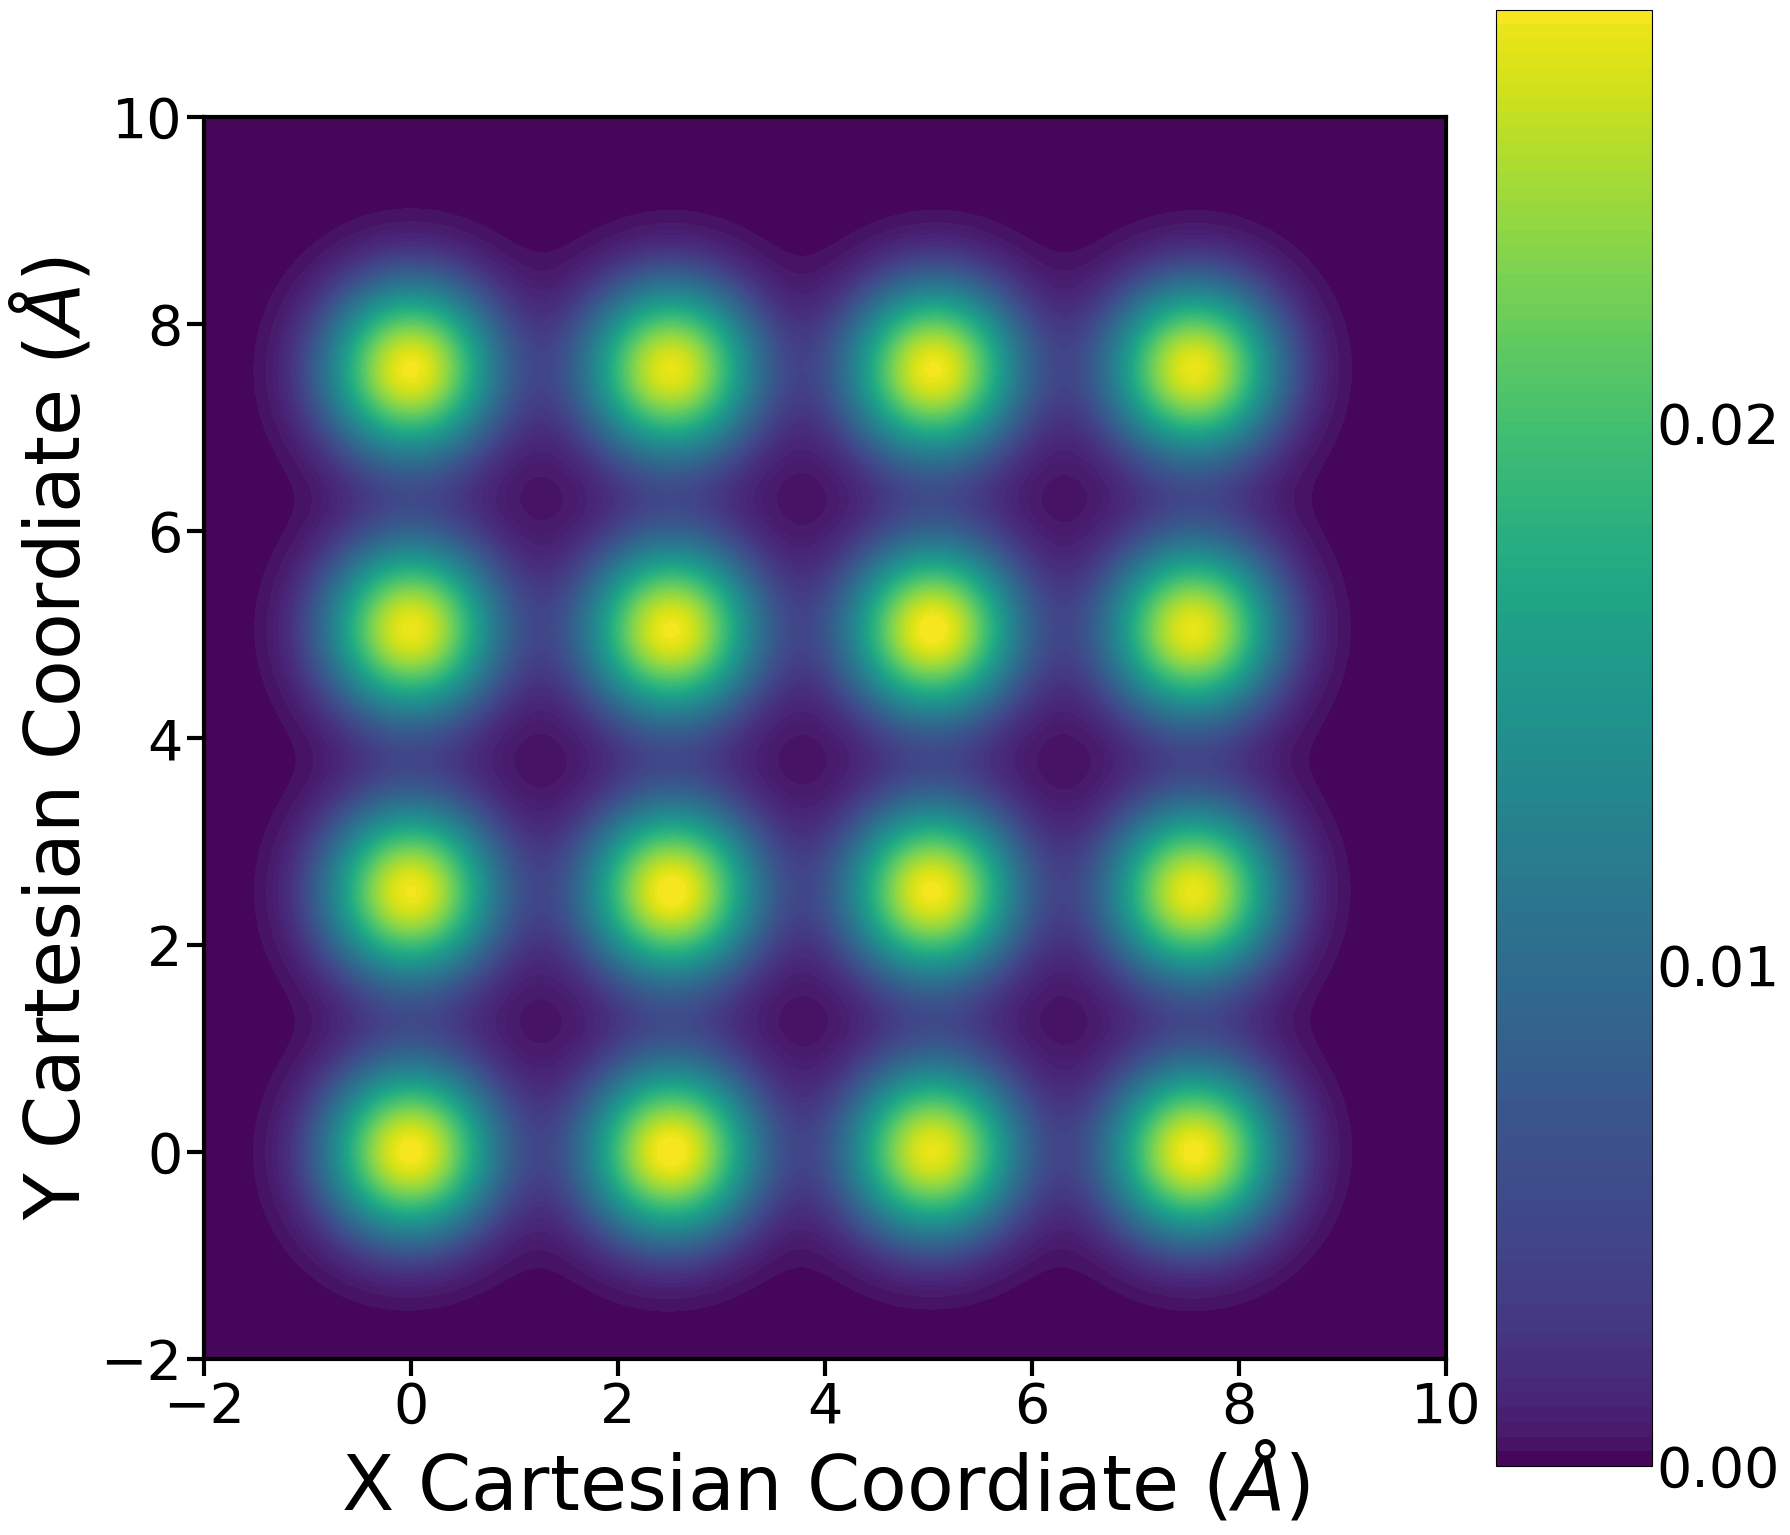

In [12]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
TiXY = sns.kdeplot(
    x=df['X'],
    y=df['Y'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = TiXY.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
_ = TiXY.set_ylabel(ylabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('TiXY.png', format='png', dpi=600)

### Ti - XZ

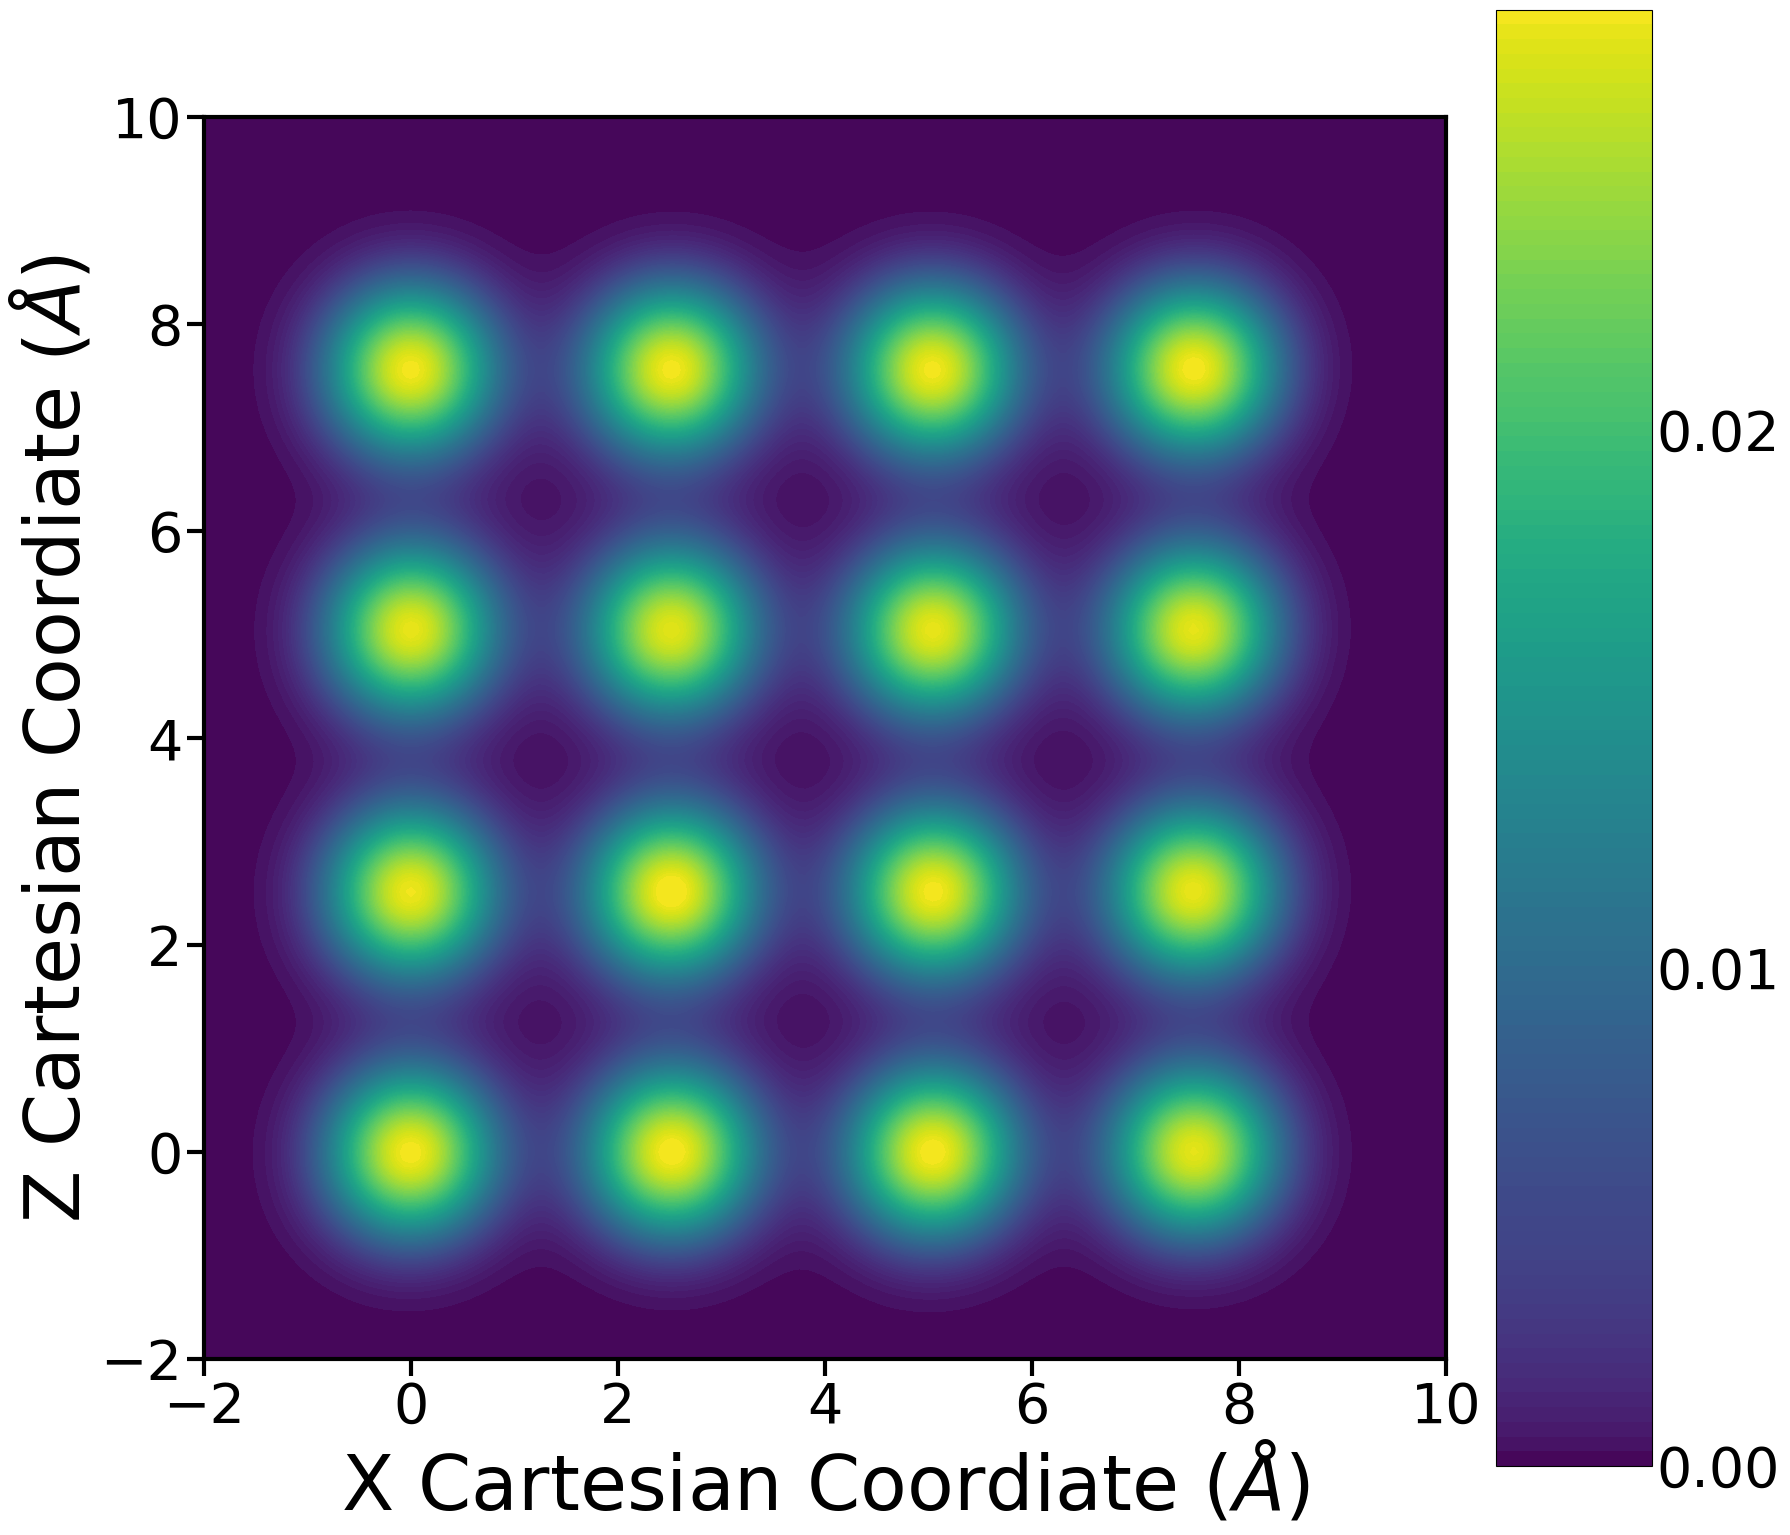

In [13]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
TiXZ = sns.kdeplot(
    x=df['X'],
    y=df['Z'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = TiXZ.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
_ = TiXZ.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('TiXZ.png', format='png', dpi=600)

### Ti - YZ

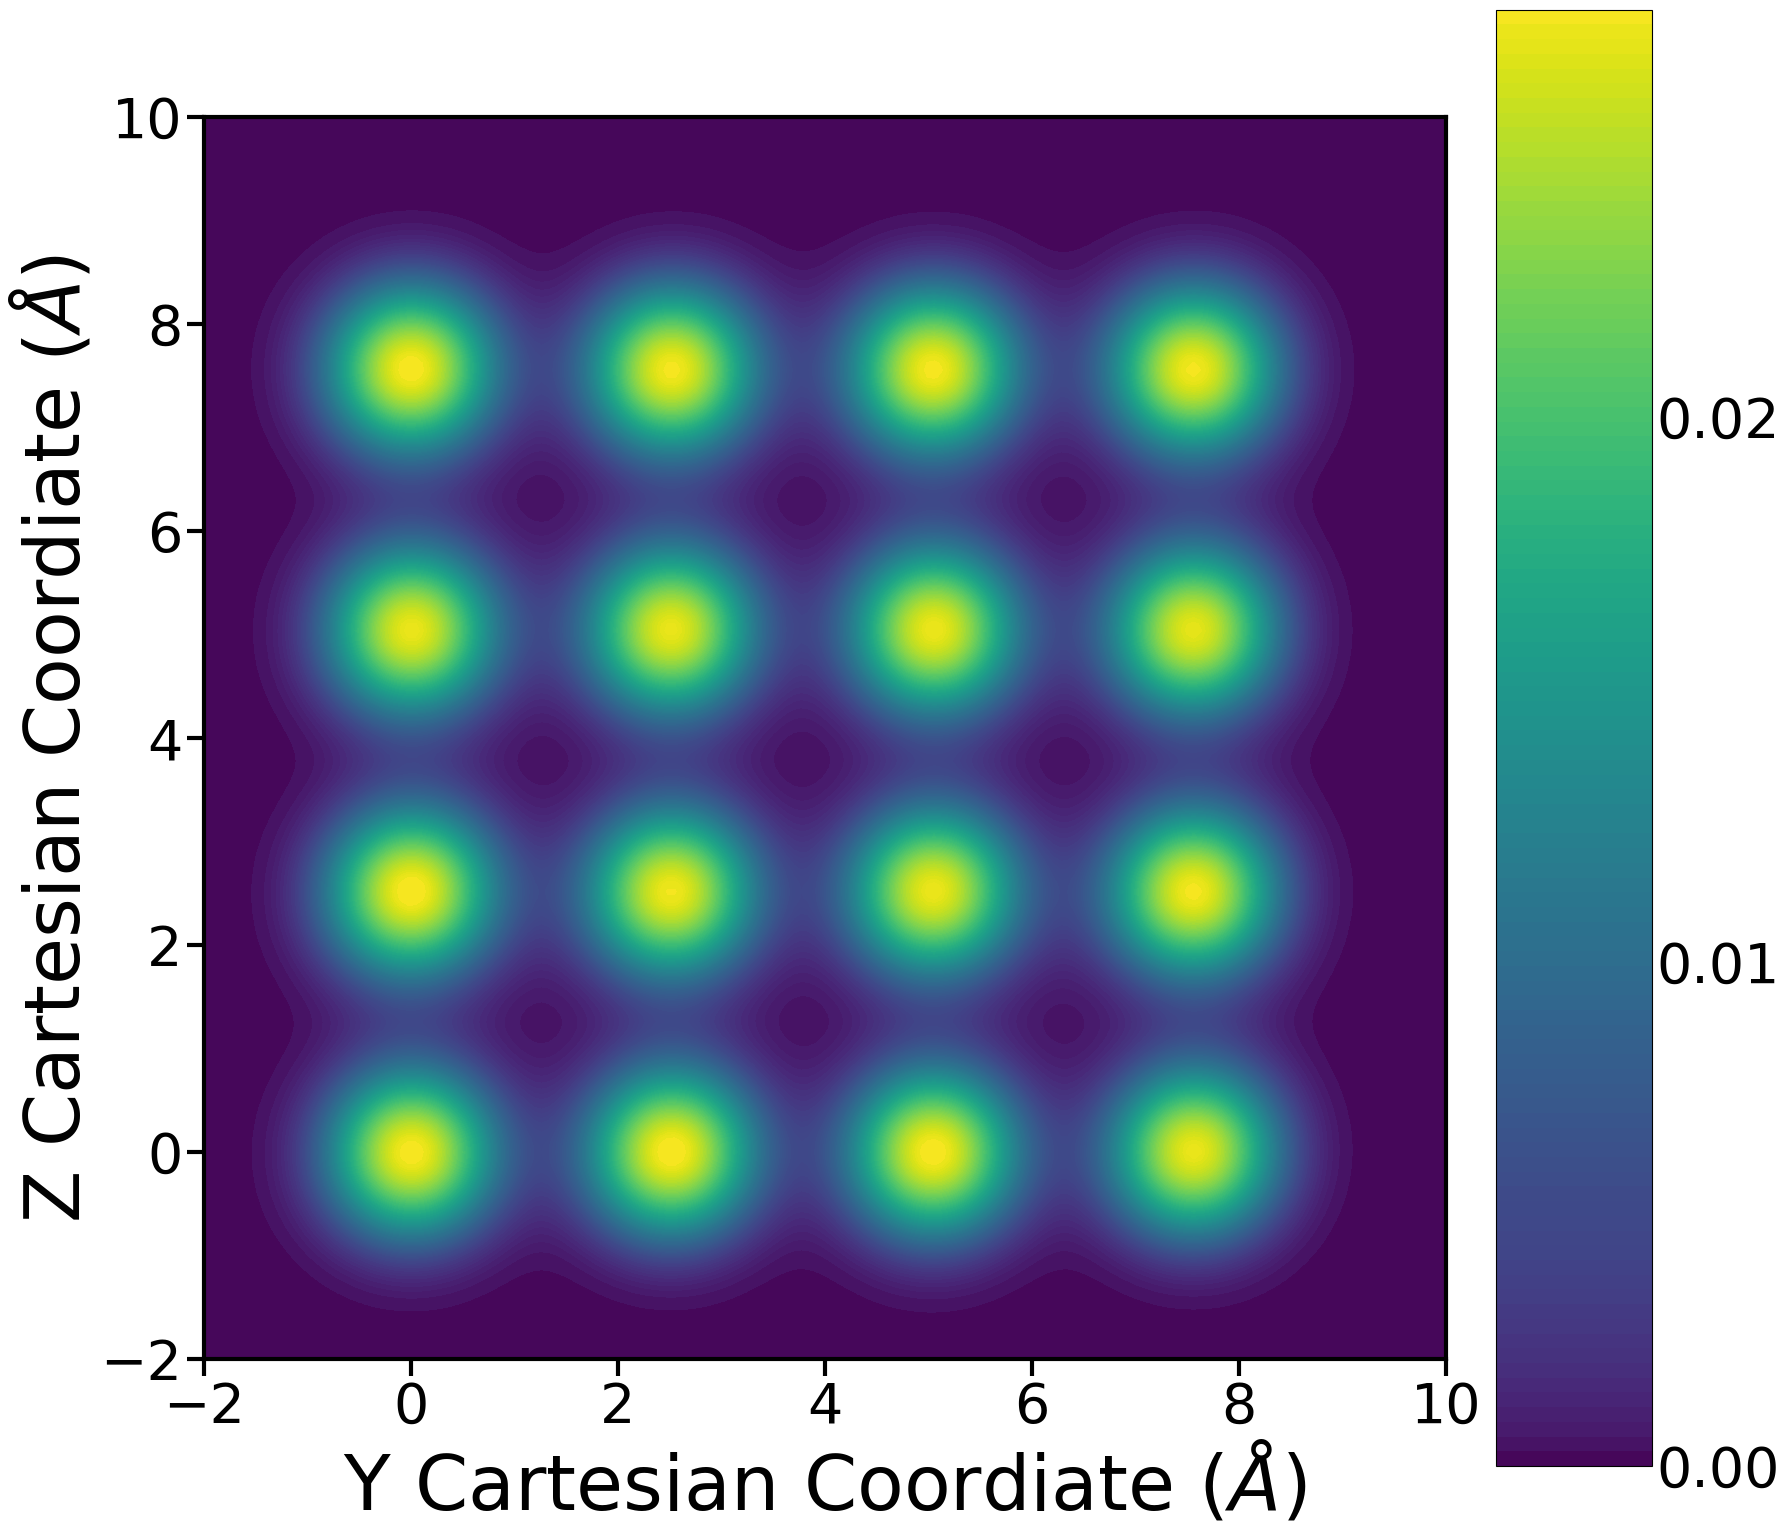

In [14]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
TiYZ = sns.kdeplot(
    x=df['Y'],
    y=df['Z'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = TiYZ.set_xlabel(xlabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
_ = TiYZ.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('TiYZ.png', format='png', dpi=600)

## Sn atoms

In [15]:
columns = ['X', 'Y', 'Z']
df = pd.read_csv("Sn.txt", header=None, names=columns, delimiter=r"\s+")

### Sn - XY

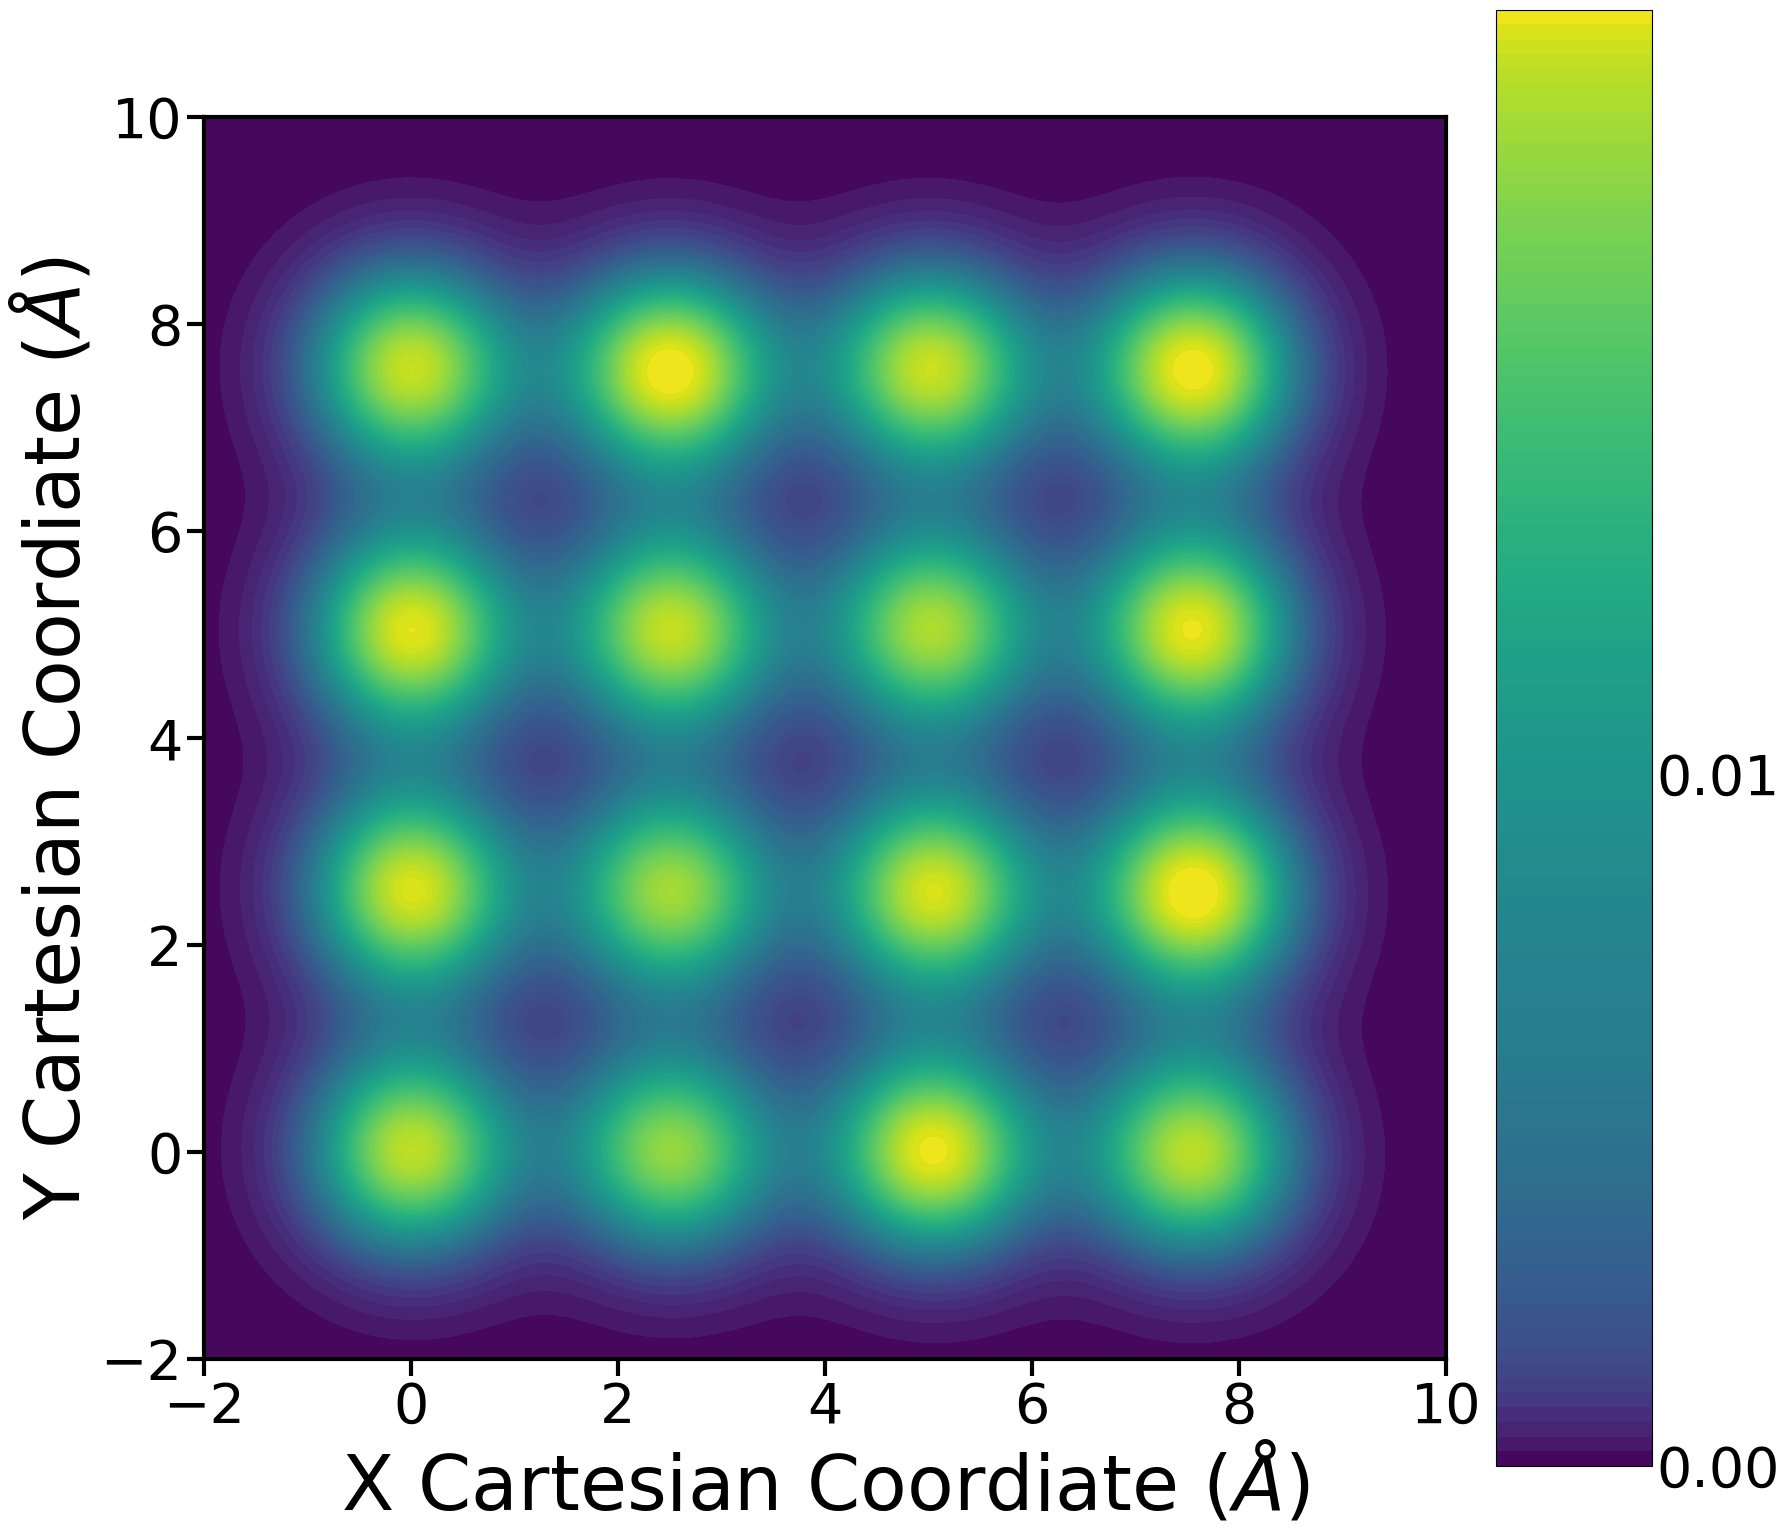

In [16]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
TiXY = sns.kdeplot(
    x=df['X'],
    y=df['Y'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = TiXY.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
_ = TiXY.set_ylabel(ylabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('SnXY.png', format='png', dpi=600)

### Sn - XZ

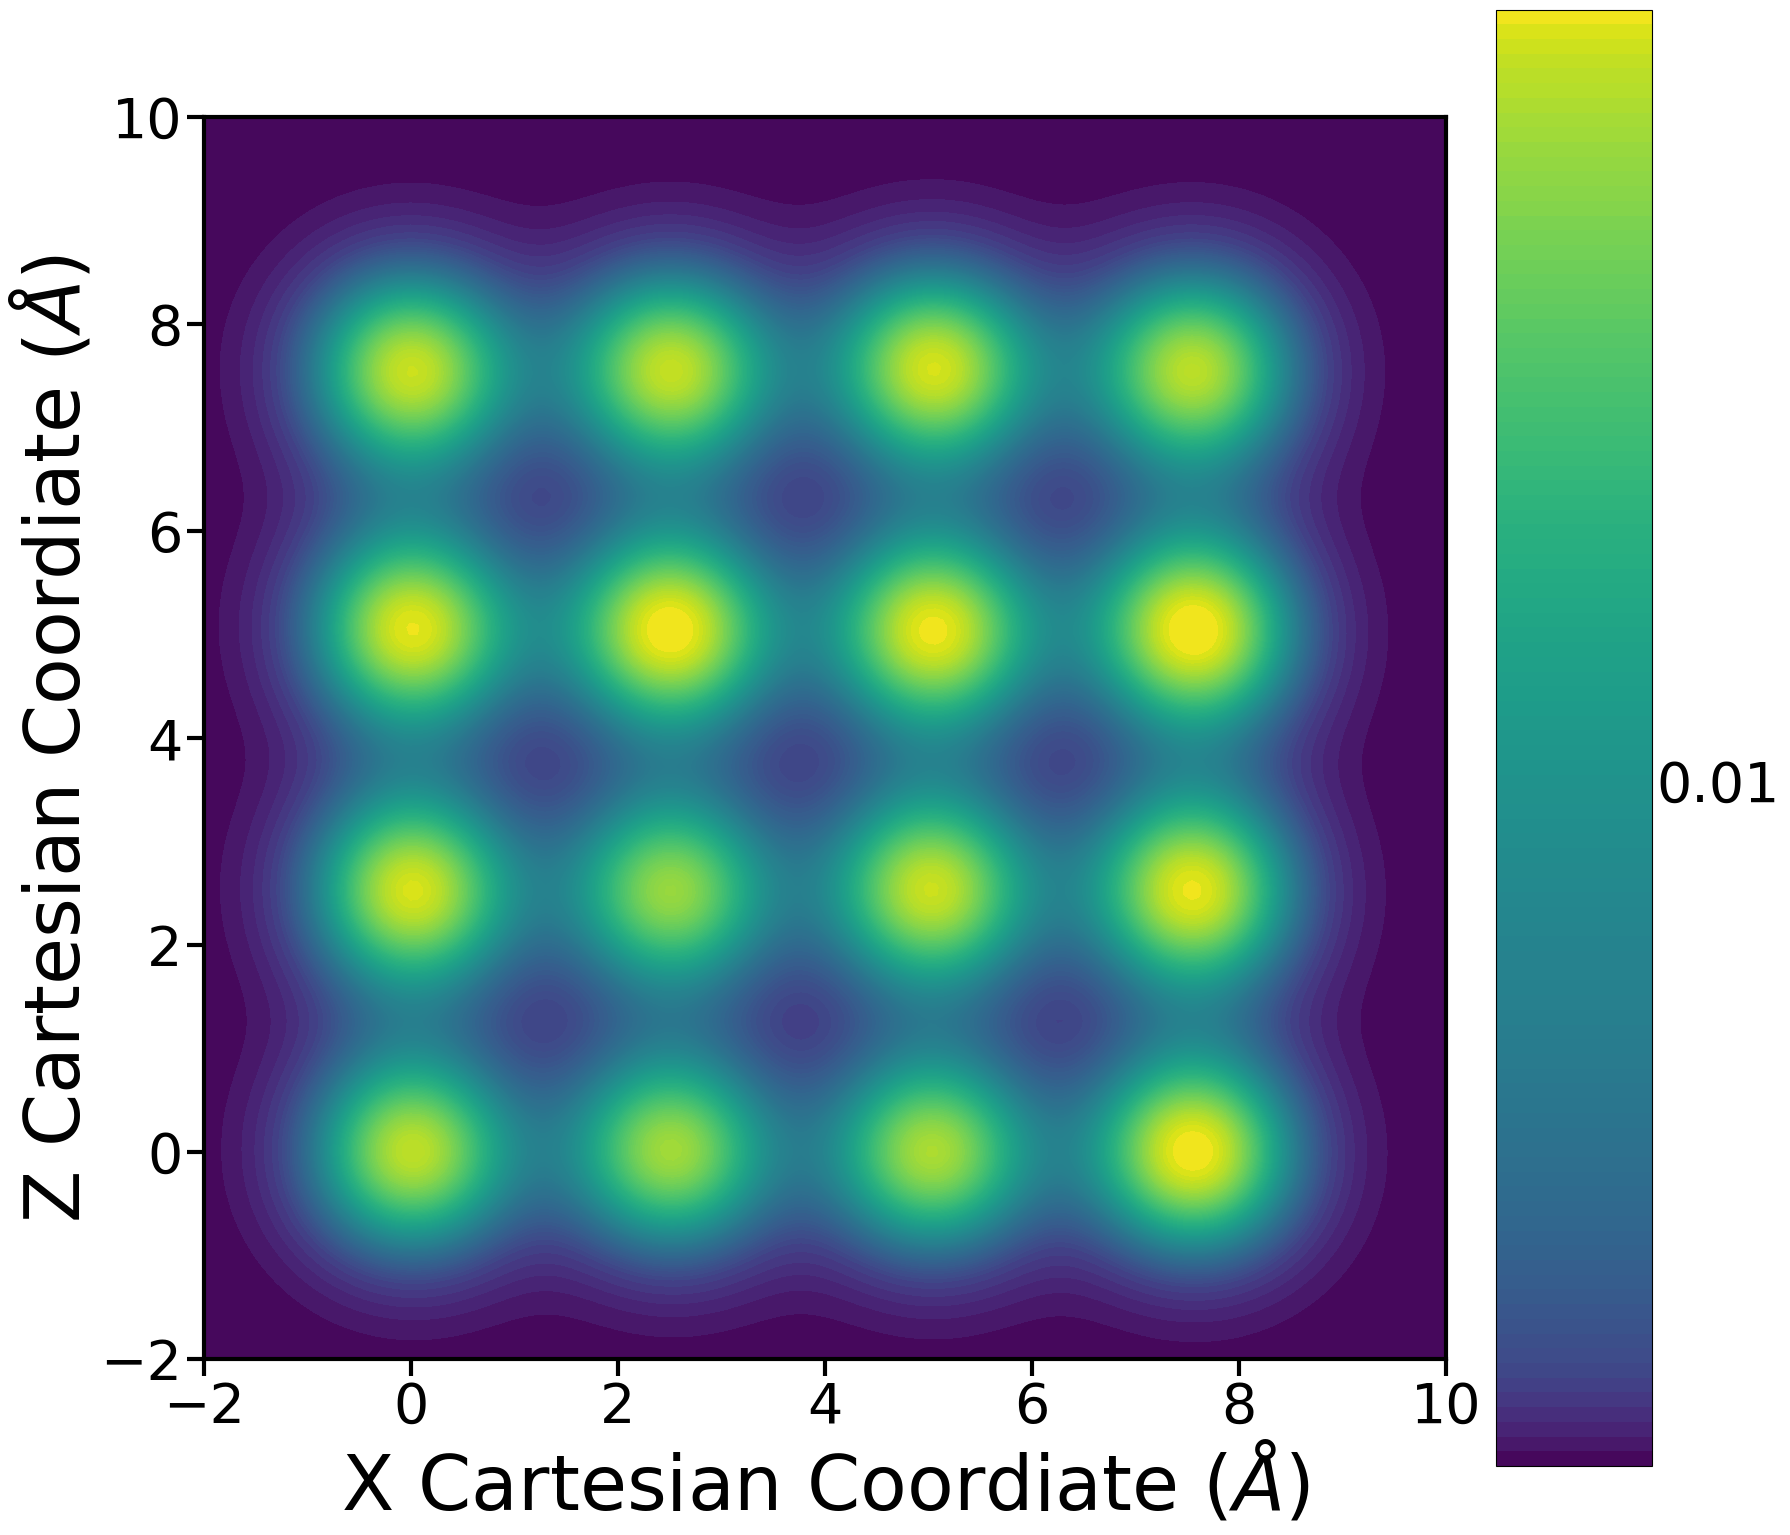

In [17]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
TiXZ = sns.kdeplot(
    x=df['X'],
    y=df['Z'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = TiXZ.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
_ = TiXZ.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('SnXZ.png', format='png', dpi=600)

### Sn - YZ

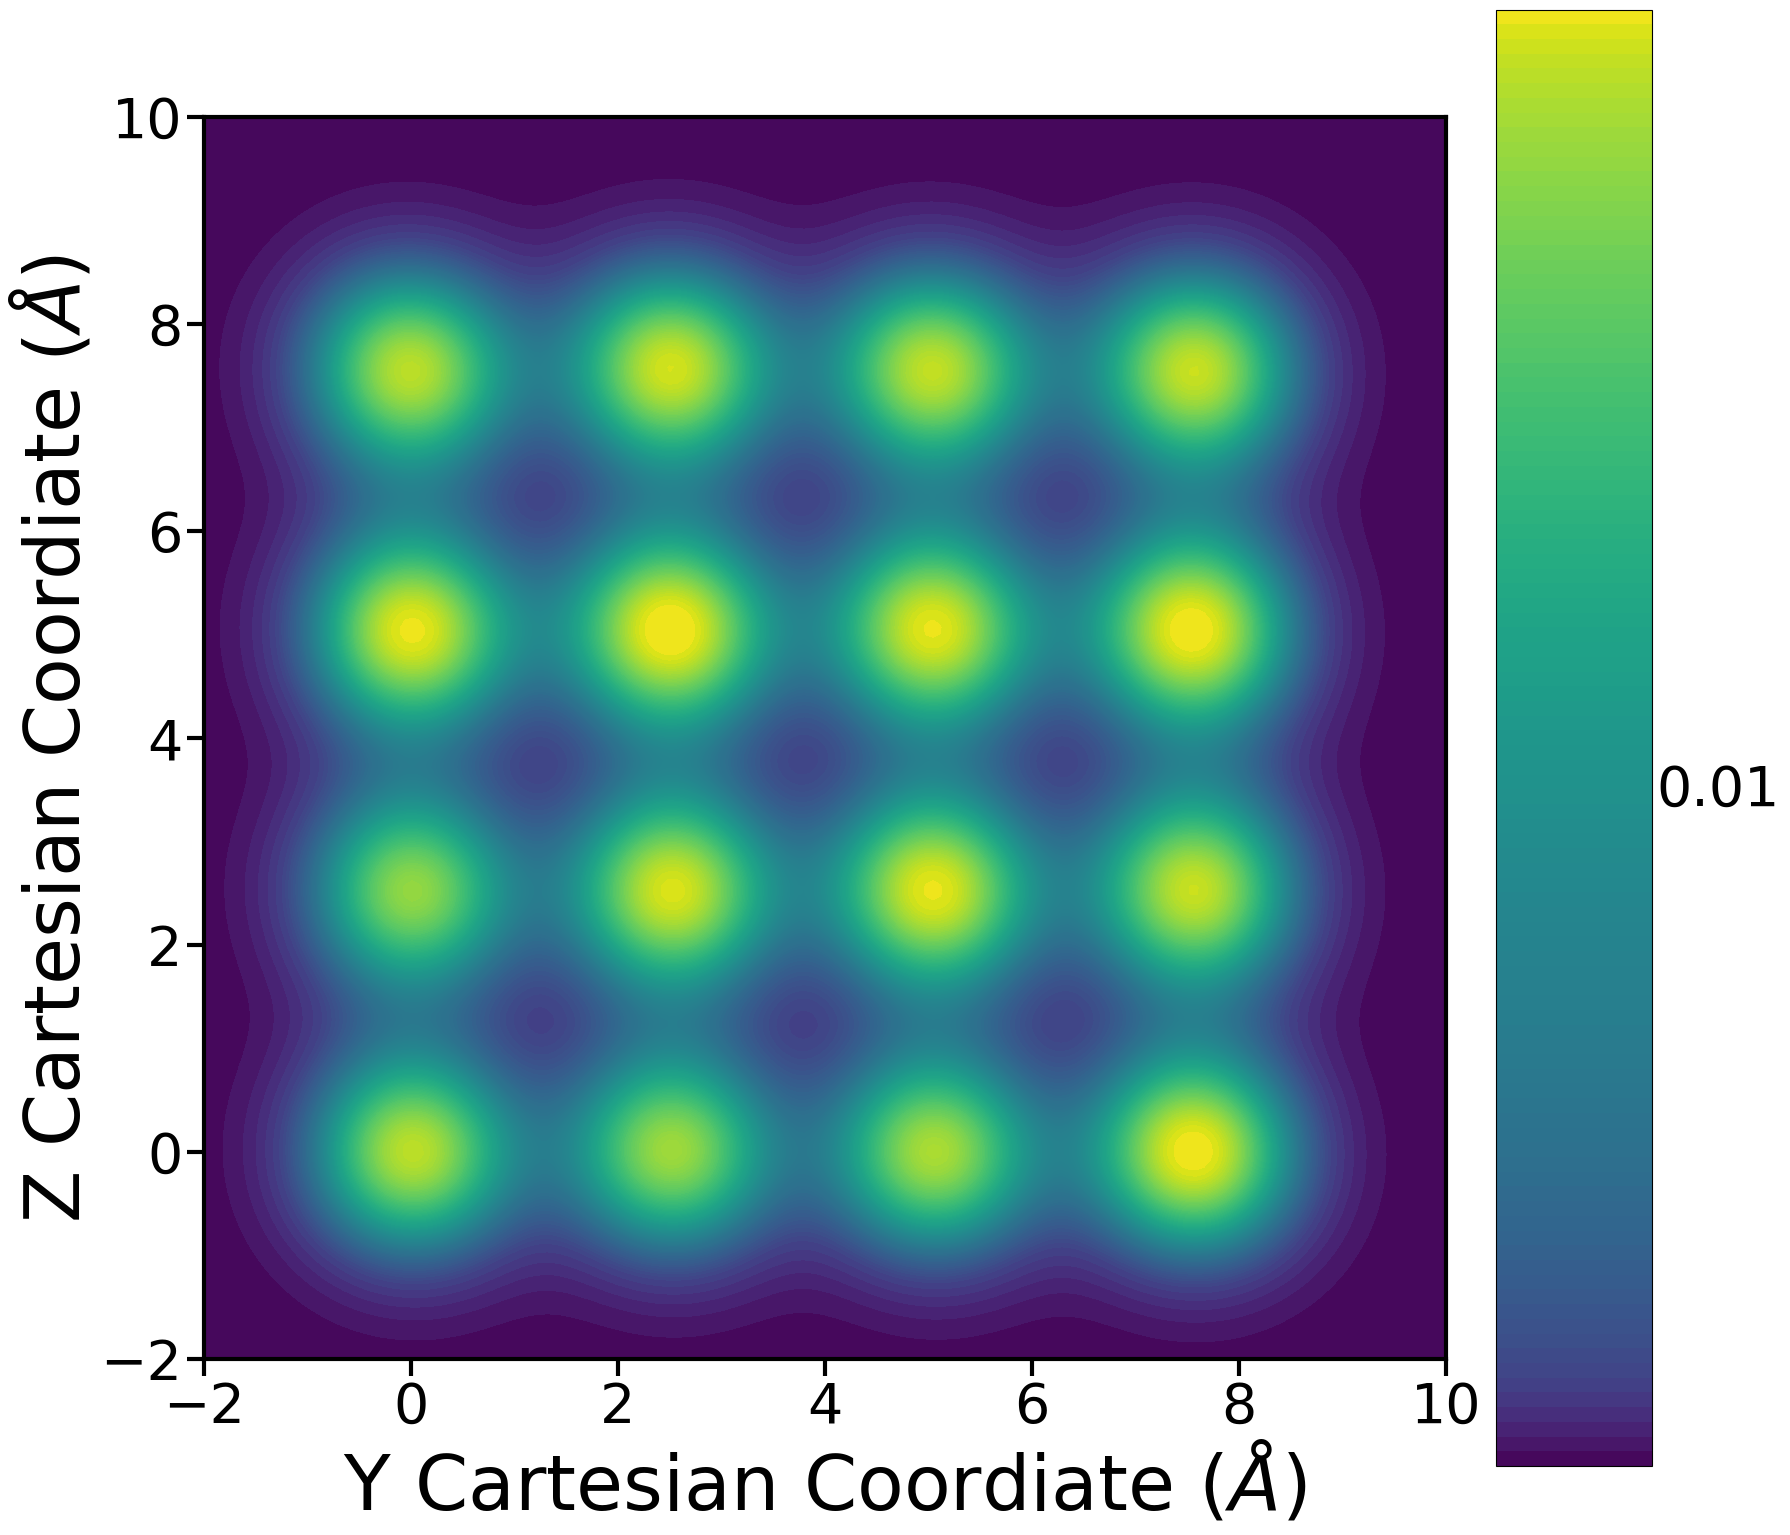

In [18]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
TiYZ = sns.kdeplot(
    x=df['Y'],
    y=df['Z'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = TiYZ.set_xlabel(xlabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
_ = TiYZ.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('SnYZ.png', format='png', dpi=600)

## Yb atoms

In [19]:
columns = ['X', 'Y', 'Z']
df = pd.read_csv("Yb.txt", header=None, names=columns, delimiter=r"\s+")

### Yb - XY

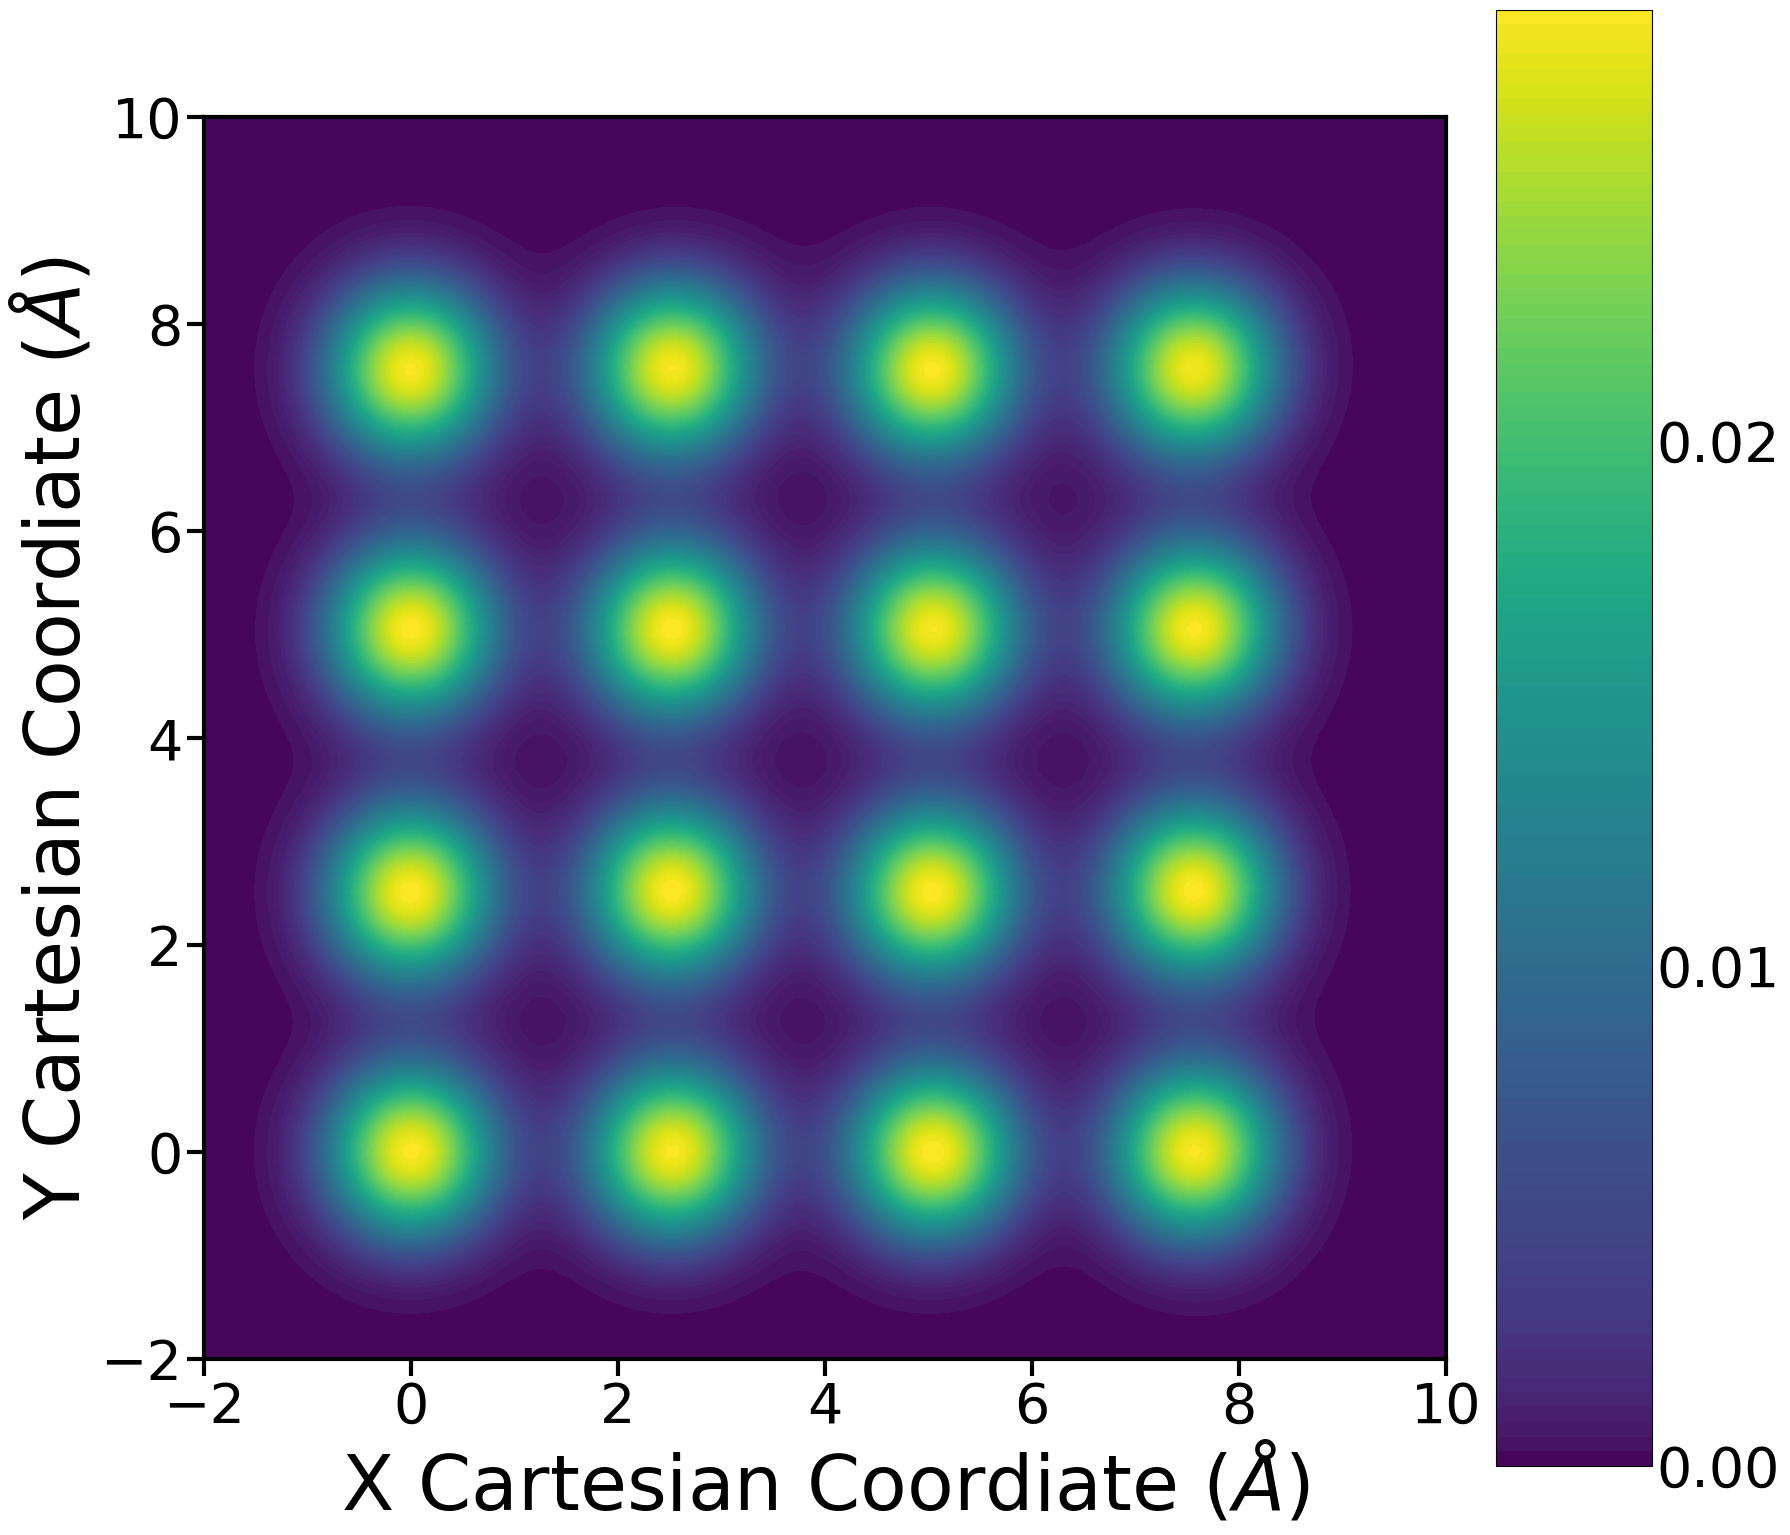

In [20]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
YbXY = sns.kdeplot(
    x=df['X'],
    y=df['Y'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = YbXY.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
_ = YbXY.set_ylabel(ylabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('YbXY.png', format='png', dpi=600)

### Yb - XZ

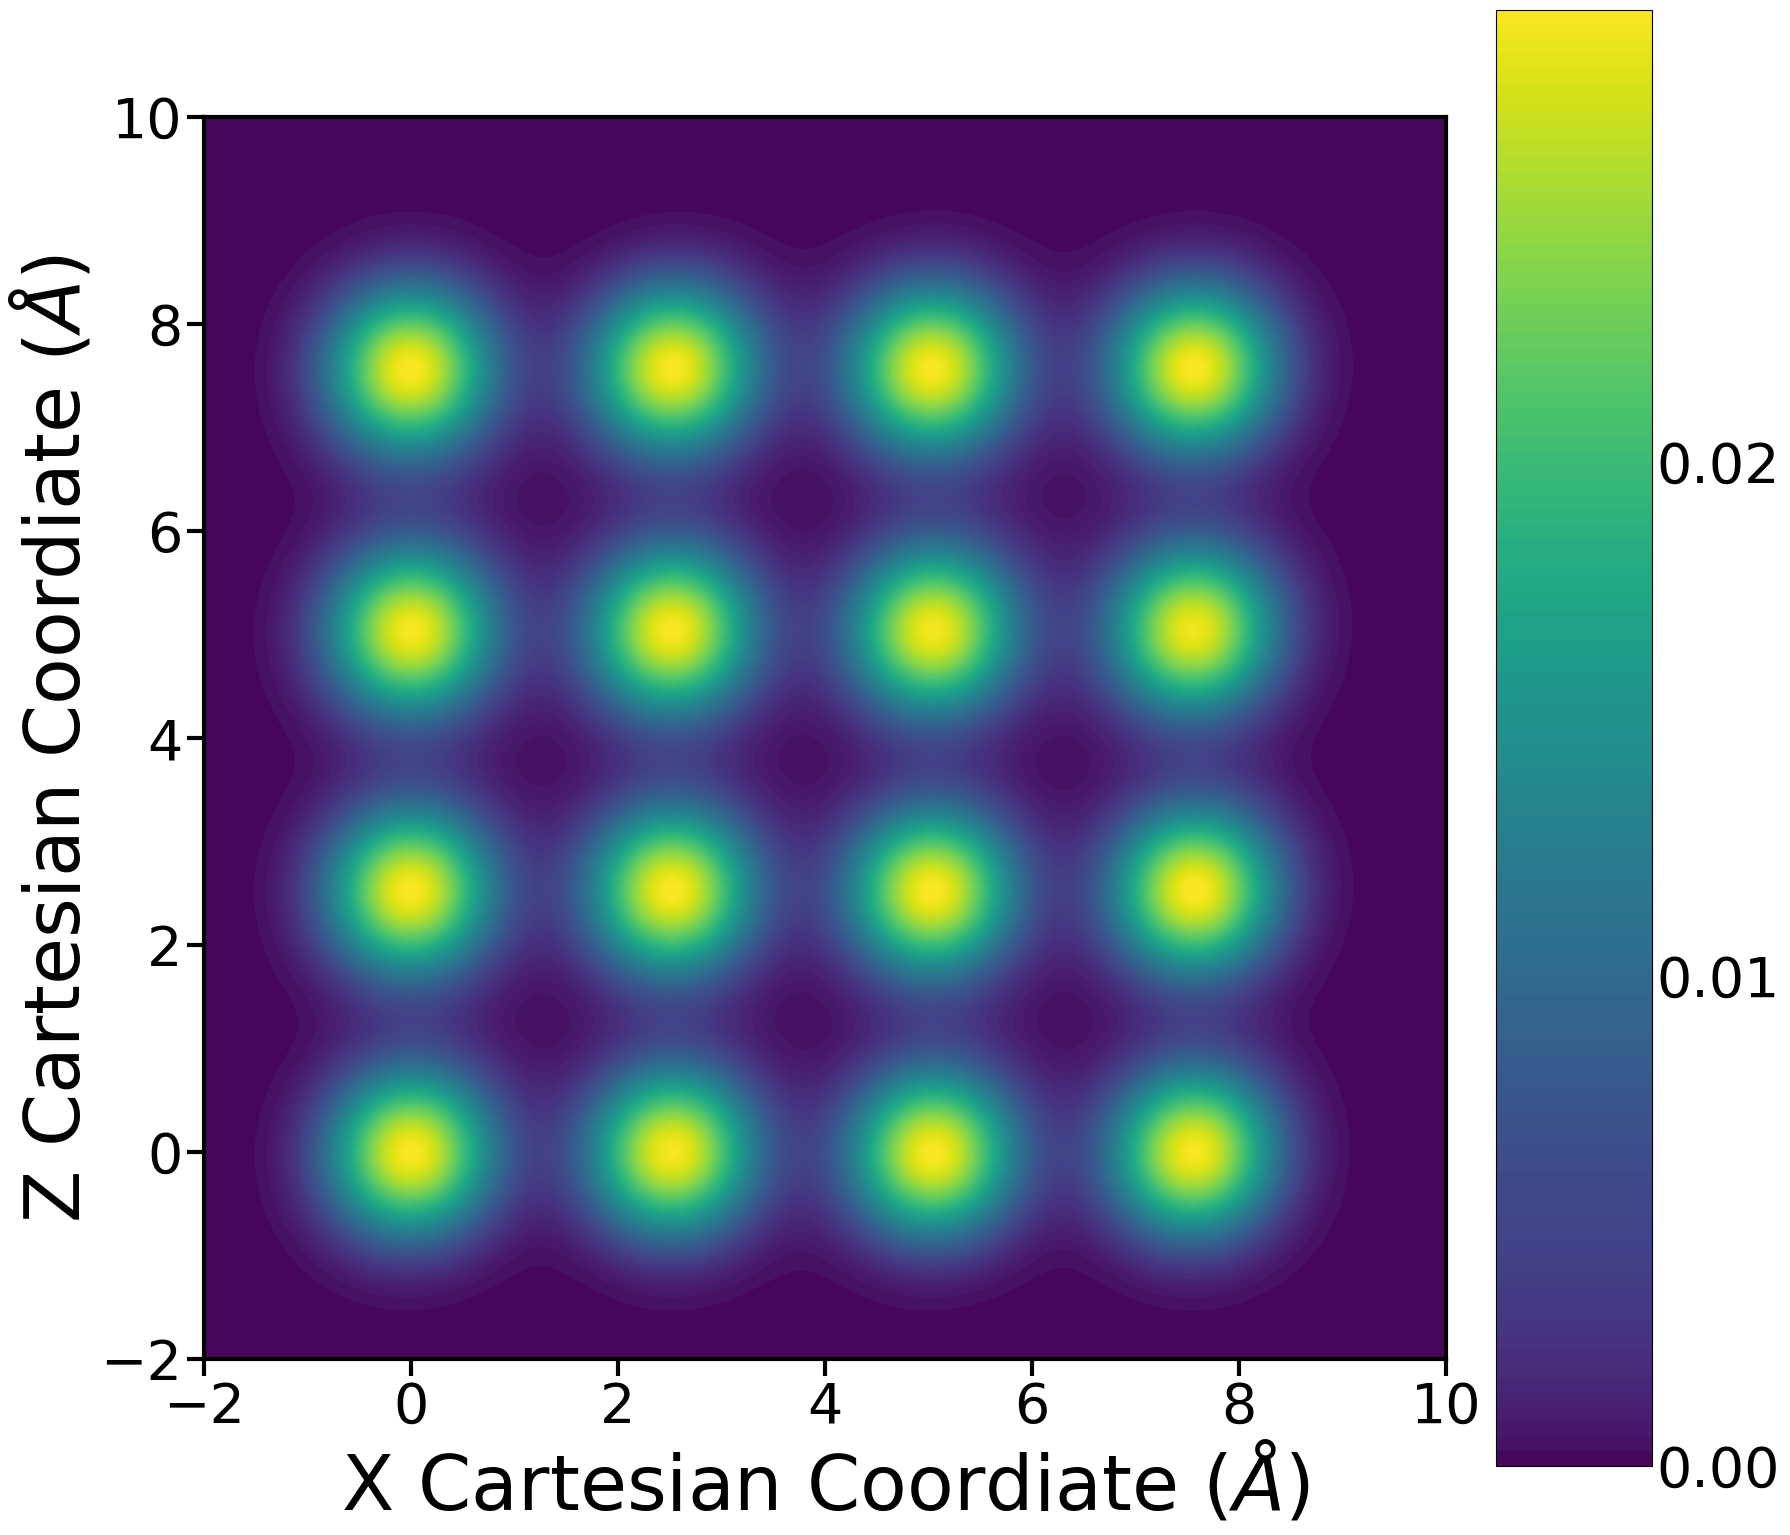

In [21]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
YbXZ = sns.kdeplot(
    x=df['X'],
    y=df['Z'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = YbXZ.set_xlabel(xlabel='X Cartesian Coordiate ($\AA$)', fontsize=55);
_ = YbXZ.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('YbXZ.png', format='png', dpi=600)

### Yb - YZ

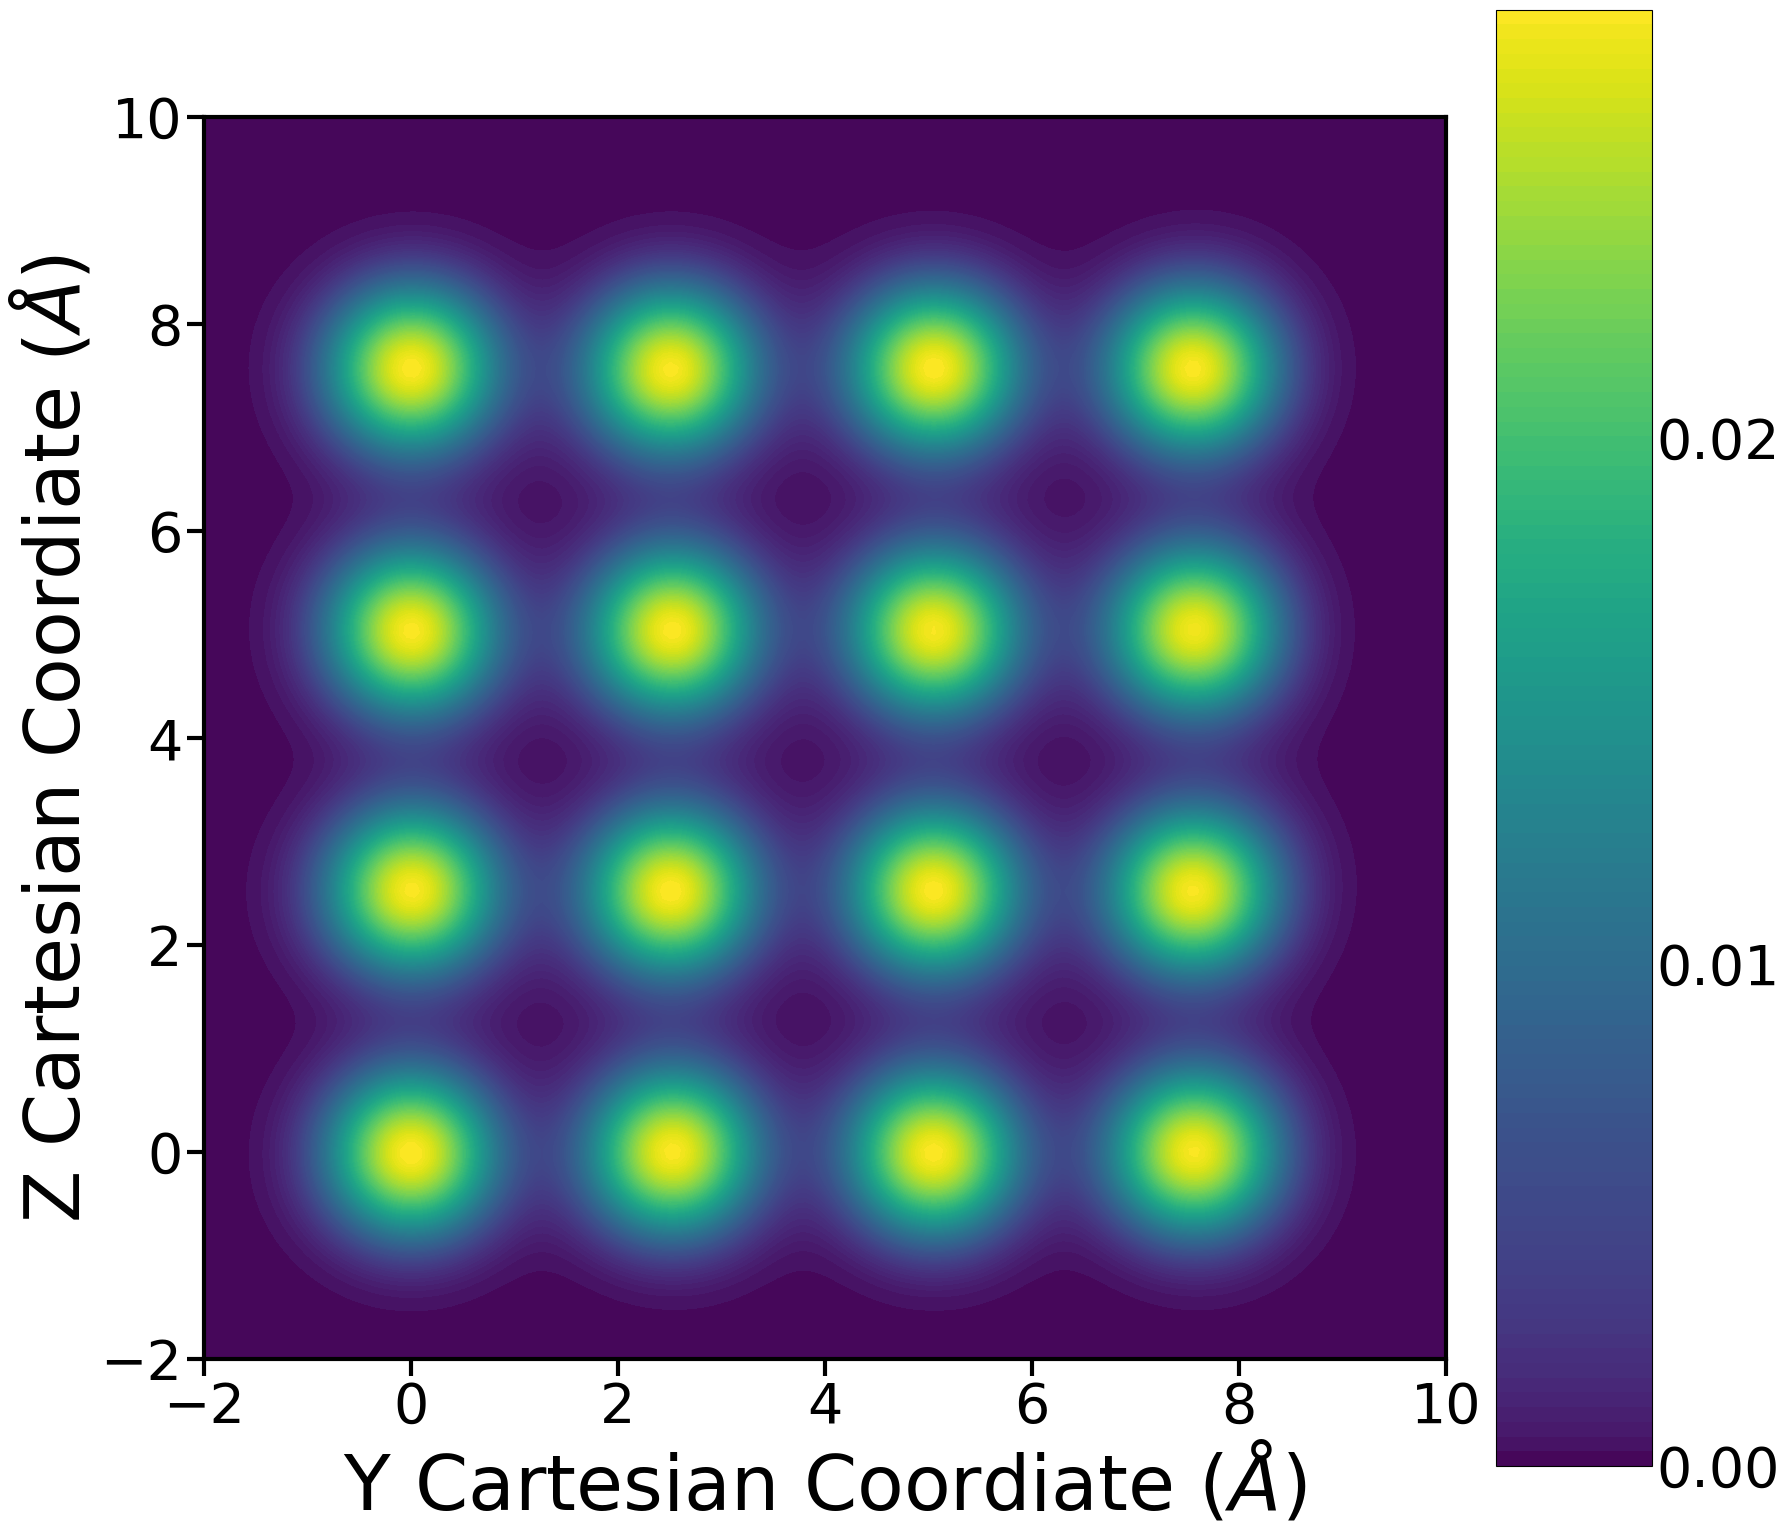

In [22]:
f = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim([-2, 10])
ax1.set_ylim([-2, 10])
ax1.tick_params(axis='x', direction='out', length=12, width=3, labelsize=40)
ax1.tick_params(axis='y', direction='out', length=12, width=3, labelsize=40)
ax1.set_aspect('equal')
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax2.tick_params(axis='y', direction='out', length=0, width=1, labelsize=40)

# Kde for Ti atoms
YbYZ = sns.kdeplot(
    x=df['Y'],
    y=df['Z'],
    fill=True,
    thresh=0,
    levels=100,
    cbar=True,
    cbar_ax=ax2,
    cbar_kws={"ticks": [0, 0.01, 0.02]},
    cmap="viridis",
    ax=ax1
)

_ = YbYZ.set_xlabel(xlabel='Y Cartesian Coordiate ($\AA$)', fontsize=55);
_ = YbYZ.set_ylabel(ylabel='Z Cartesian Coordiate ($\AA$)', fontsize=55);
plt.tight_layout()
_ = f.savefig('YbYZ.png', format='png', dpi=600)

# Python part - fitting plot

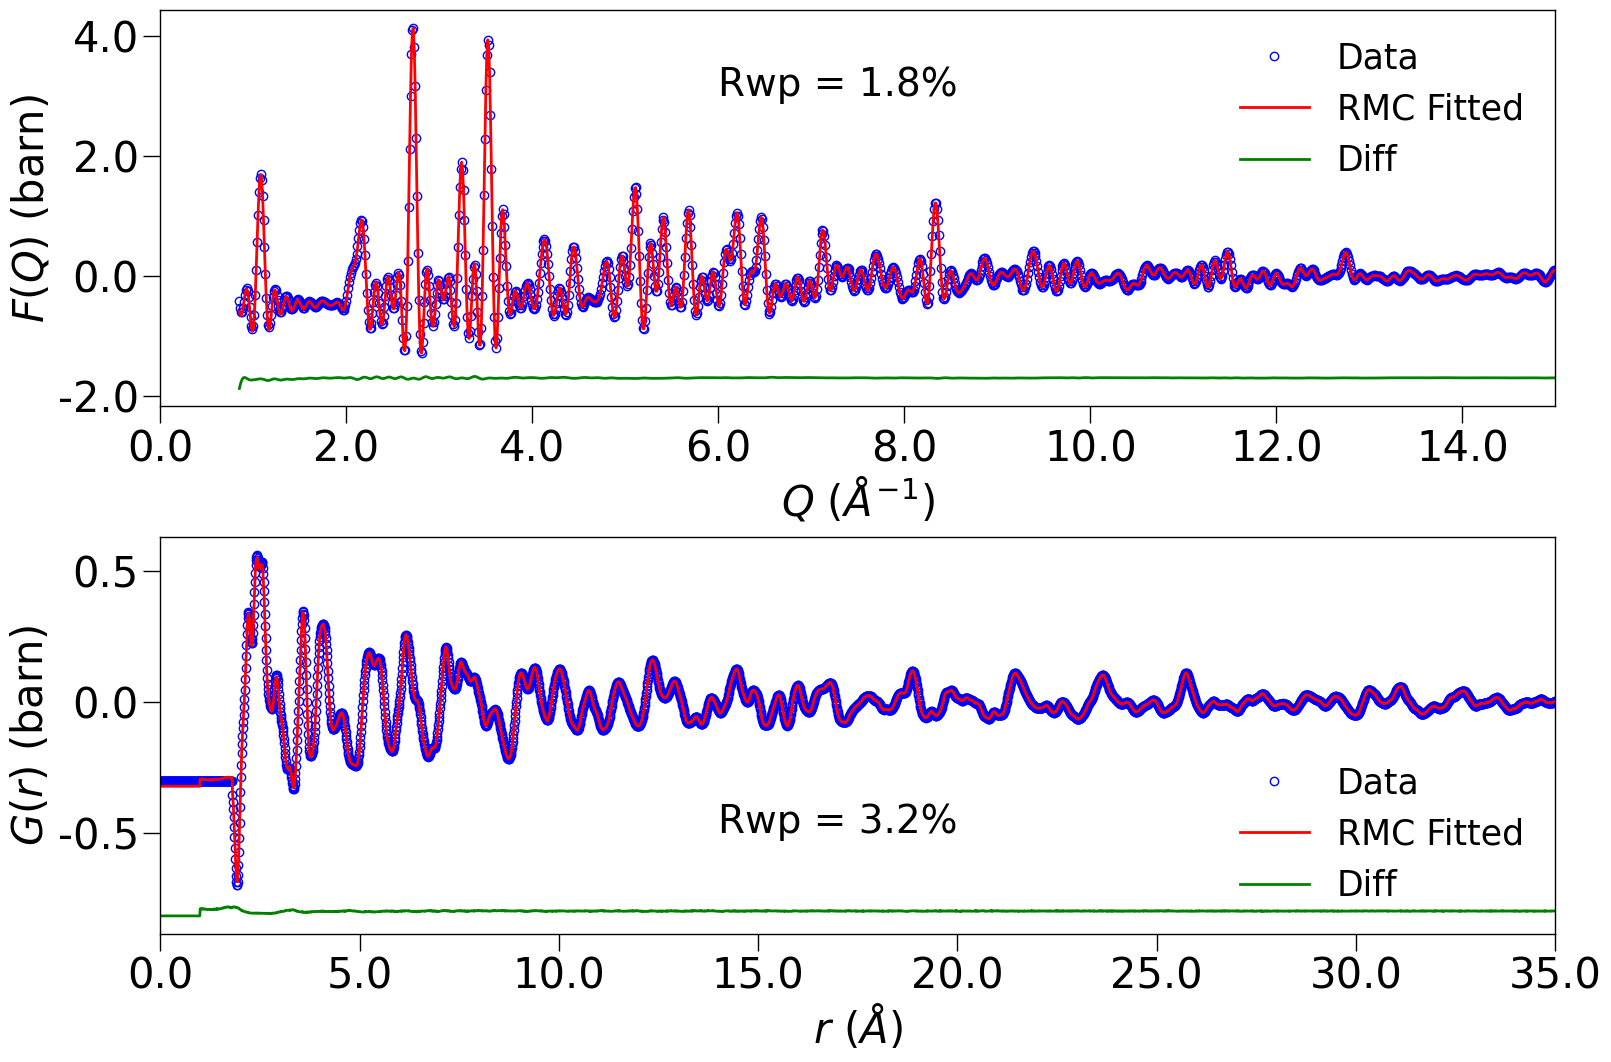

In [23]:
# S(Q)
sofq_data = stem_name + "_SQ1.csv"
sofq_df = pd.read_csv(sofq_data)

sofq_q = sofq_df['Q (Ang^-1)'].tolist()
sofq_fitted = sofq_df[' RMC'].tolist()
sofq_data = sofq_df[' Data'].tolist()
sofq_diff = list()
for item1, item2 in zip(sofq_fitted, sofq_data):
    sofq_diff.append(item1 - item2 - 1.7)

# f = plt.figure(figsize=(18, 12))
# gs = gridspec.GridSpec(2, 1, hspace=0.33)
# ax1 = plt.subplot(gs[0, 0])
# ax2 = plt.subplot(gs[1, 0])

f, (ax1, ax2) = plt.subplots(2, figsize=(18, 12))
    
ax1.plot(sofq_q, sofq_data, 'bo', label="Data", linewidth=2, mfc='none')
ax1.plot(sofq_q, sofq_fitted, 'r-', label="RMC Fitted", linewidth=2)
ax1.plot(sofq_q, sofq_diff, 'g-', label="Diff", linewidth=2)

# Calc chi^2
import numpy as np
sum_top = 0.
sum_bottom = 0.
for i, item in enumerate(sofq_data):
    sum_top += (item - sofq_fitted[i])**2.
    sum_bottom += (item)**2.
rw_sofq = np.sqrt(sum_top / sum_bottom)

ax1.set_xlim([0, 15])
# ax1.set_ylim([0, 35])
ax1.tick_params(axis='x', direction='out', length=12, width=1, labelsize=30)
ax1.tick_params(axis='y', direction='out', length=12, width=1, labelsize=30)
ax1.spines['left'].set_linewidth(1)
ax1.spines['right'].set_linewidth(1)
ax1.spines['top'].set_linewidth(1)
ax1.spines['bottom'].set_linewidth(1)
ax1.set_xlabel(r"$Q$ ($\AA^{-1}$)", fontdict={'size': 30})
ax1.set_ylabel(r"$F(Q)$ (barn)", fontdict={'size': 30})
ax1.legend(fontsize=25, frameon=False)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.text(6.0, 3.0, "Rwp = {0:3.1F}%".format(rw_sofq * 100.), fontsize=28)

# PDF
pdf_data = stem_name + "_PDF1.csv"
pdf_df = pd.read_csv(pdf_data)

pdf_r = pdf_df['r (Ang)'].tolist()
pdf_fitted = pdf_df[' PDF (RMC)'].tolist()
pdf_data = pdf_df[' PDF (Expt)'].tolist()
pdf_diff = list()
for item1, item2 in zip(pdf_fitted, pdf_data):
    pdf_diff.append(item1 - item2 - 0.8)

ax2.plot(pdf_r, pdf_data, 'bo', label="Data", linewidth=2, mfc='none')
ax2.plot(pdf_r, pdf_fitted, 'r-', label="RMC Fitted", linewidth=2)
ax2.plot(pdf_r, pdf_diff, 'g-', label="Diff", linewidth=2)

# Calc chi^2
import numpy as np
sum_top = 0.
sum_bottom = 0.
for i, item in enumerate(pdf_data):
    sum_top += (item - pdf_fitted[i])**2.
    sum_bottom += (item)**2.
rw_pdf = np.sqrt(sum_top / sum_bottom)

ax2.set_xlim([0, 35])
# ax2.set_ylim([0, 35])
ax2.tick_params(axis='x', direction='out', length=12, width=1, labelsize=30)
ax2.tick_params(axis='y', direction='out', length=12, width=1, labelsize=30)
ax2.spines['left'].set_linewidth(1)
ax2.spines['right'].set_linewidth(1)
ax2.spines['top'].set_linewidth(1)
ax2.spines['bottom'].set_linewidth(1)
ax2.set_xlabel(r"$r$ ($\AA$)", fontdict={'size': 30})
ax2.set_ylabel(r"$G(r)$ (barn)", fontdict={'size': 30})
ax2.legend(fontsize=25, frameon=False)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.text(14.0, -0.5, "Rwp = {0:3.1F}%".format(rw_pdf * 100.), fontsize=28)
plt.subplots_adjust(hspace=0.33)
_ = f.savefig('fitting.png', format='png', bbox_inches='tight', dpi=600)

# Bash part - remove the ending comma in each line

In [24]:
sed 's/..$//' < ${stem_name}_PDFpartials.csv > ${stem_name}_PDFpartials_new.csv

# Python part - partials plot

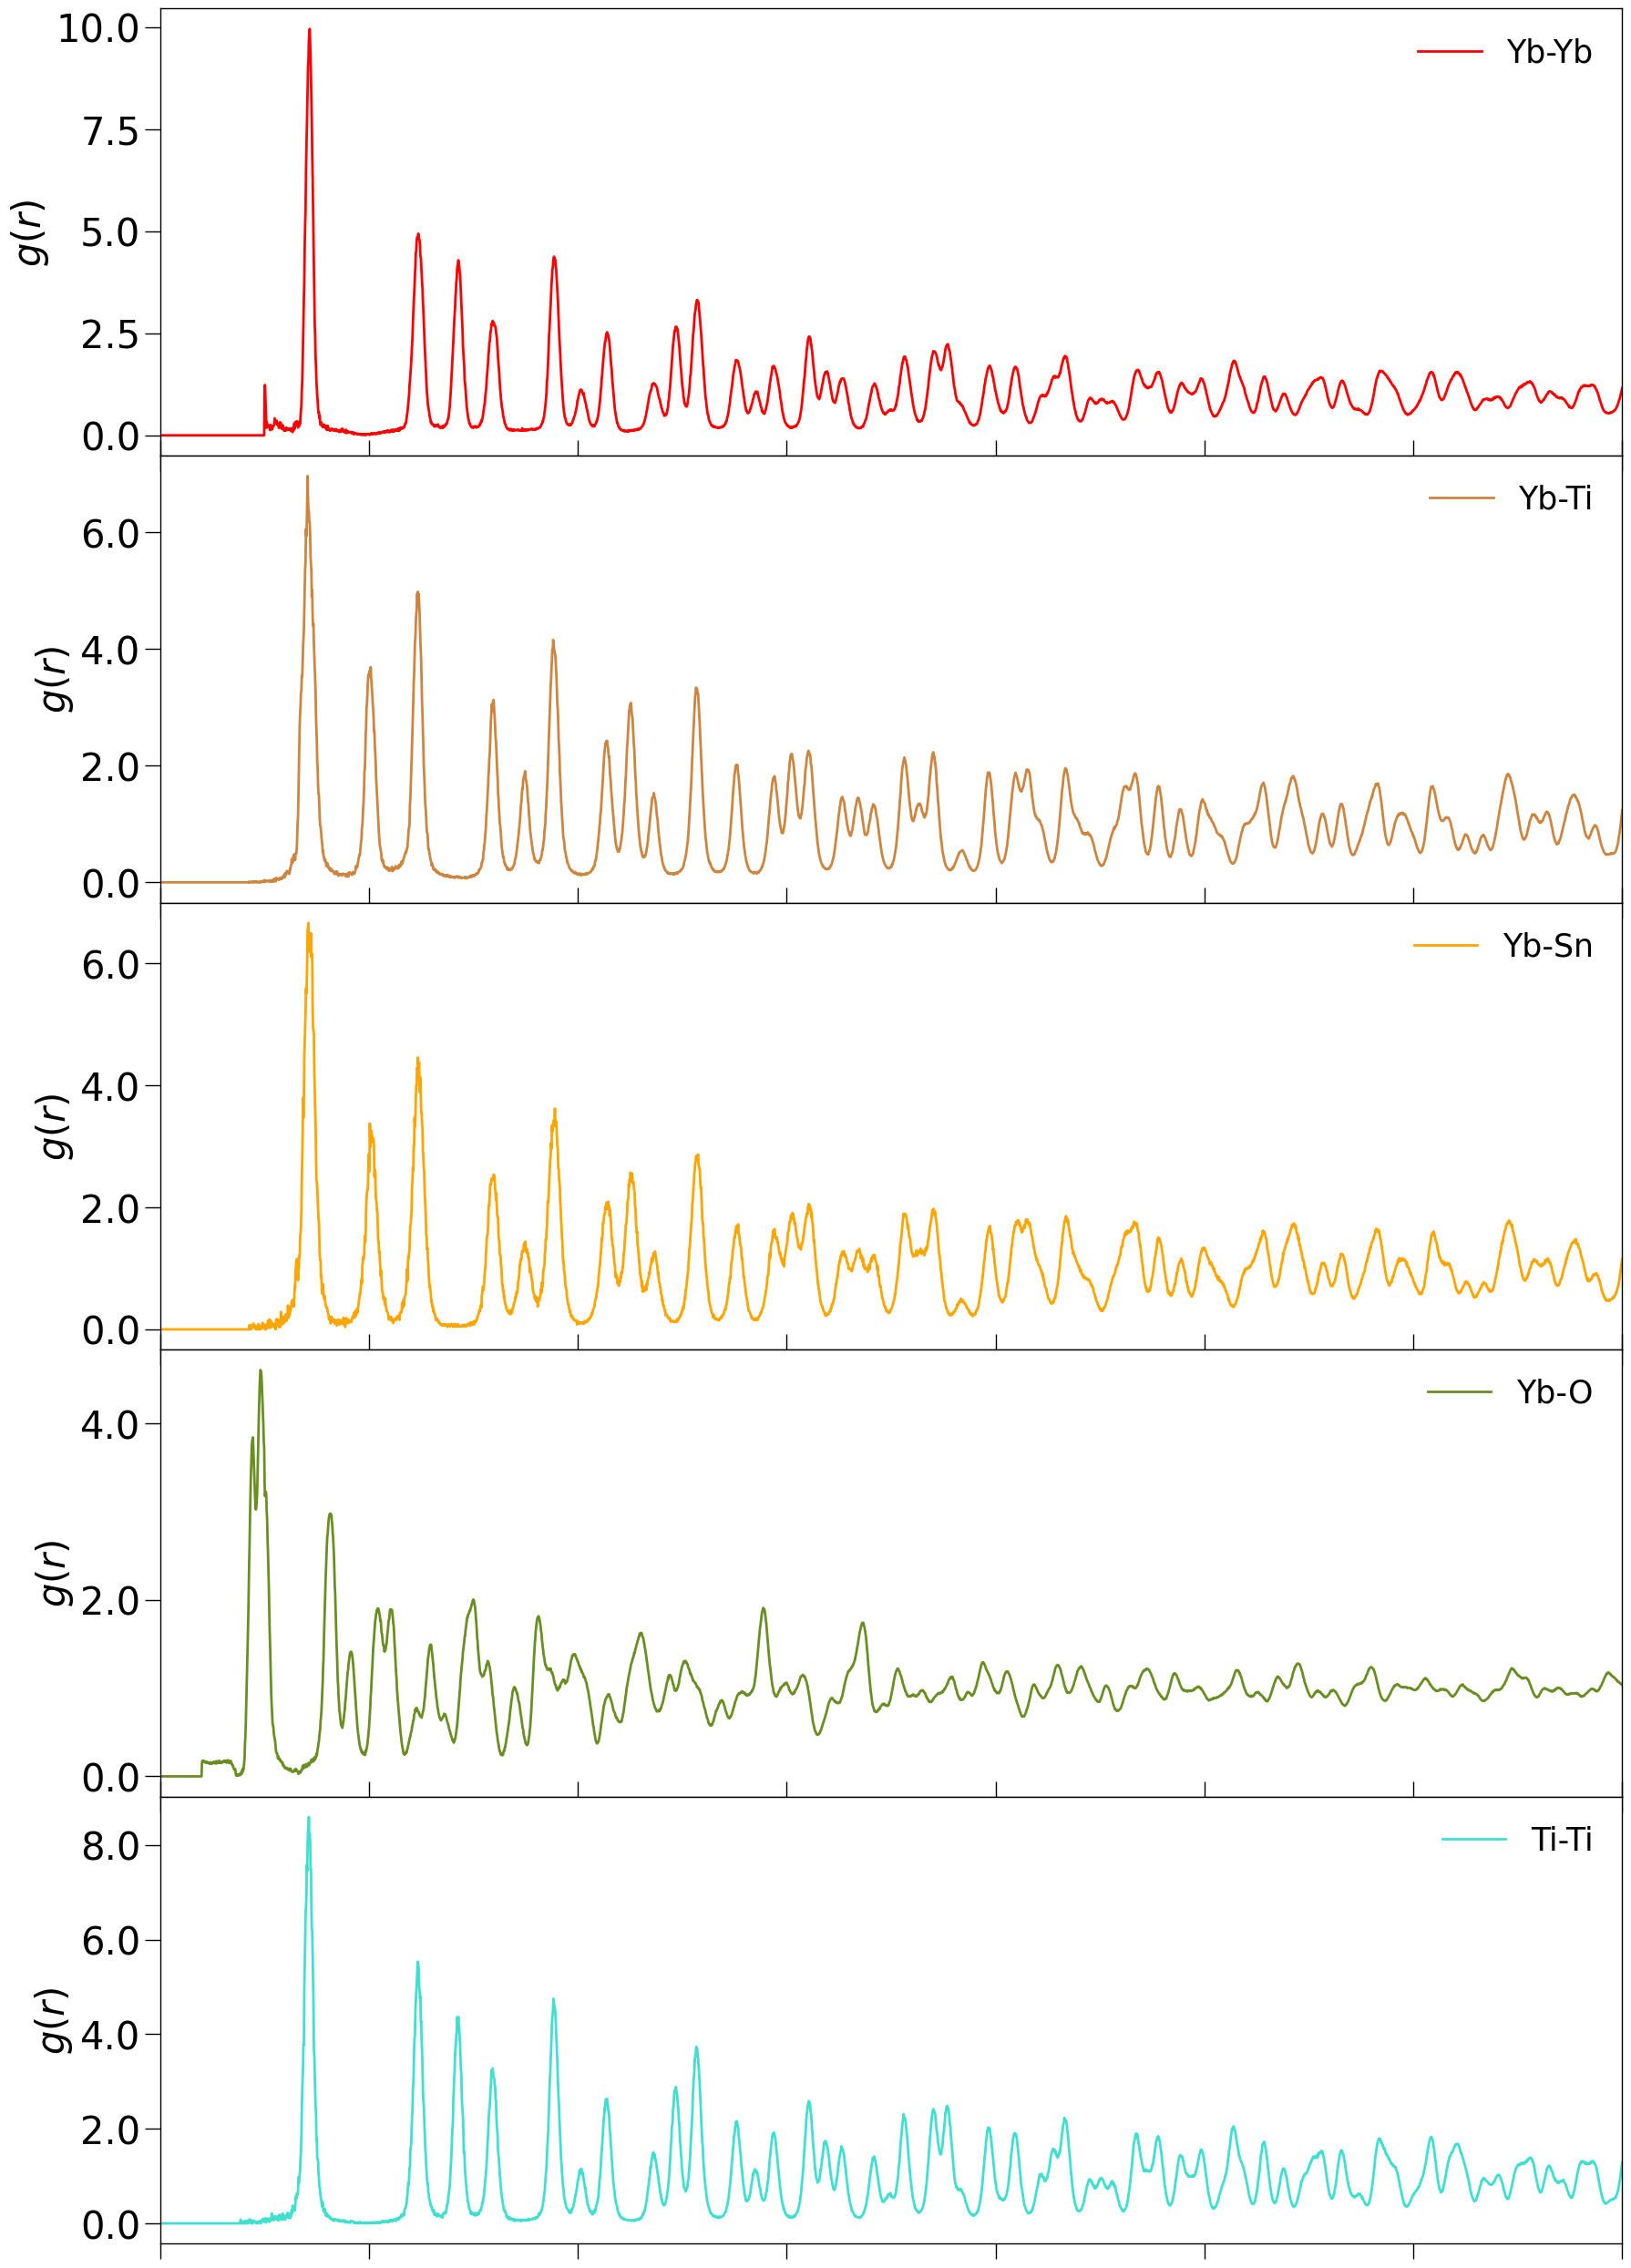

In [25]:
f = plt.figure(figsize=(18, 25))
gs = gridspec.GridSpec(5, 1, height_ratios=[1 for _ in range(5)], hspace=0)
axes = list()
for i in range(5):
    axes.append(plt.subplot(gs[i, 0]))

partial_dict = {
    0: {
        "label": "Yb-Yb",
        "color": "red"
    },
    1: {
        "label": "Yb-Ti",
        "color": "peru"
    },
    2: {
        "label": "Yb-Sn",
        "color": "orange"
    },
    3: {
        "label": "Yb-O",
        "color": "olivedrab"
    },
    4: {
        "label": "Ti-Ti",
        "color": "turquoise"
    }
}

partial_data = stem_name + "_PDFpartials_new.csv"
partial_df = pd.read_csv(partial_data)

for i in range(5):
    partial_r = partial_df.iloc[:, 0].tolist()
    partial_data = partial_df.iloc[:, i + 1].tolist()

    axes[i].plot(partial_r, partial_data, '-', color=partial_dict[i]["color"],
                 label=partial_dict[i]["label"], linewidth=2)

    axes[i].set_xlim([0, 35])
    axes[i].tick_params(axis='x', direction='out', length=12, width=1, labelsize=30)
    if i != 5:
        axes[i].set_xticklabels([])
    if i > 0:
        axes[i].xaxis.set_ticks_position('both')
    axes[i].tick_params(axis='y', direction='out', length=12, width=1, labelsize=30)
    axes[i].spines['left'].set_linewidth(1)
    axes[i].spines['right'].set_linewidth(1)
    axes[i].spines['top'].set_linewidth(1)
    axes[i].spines['bottom'].set_linewidth(1)
    if i == 5:
        axes[i].set_xlabel(r"$r$ ($\AA$)", fontdict={'size': 30})
    axes[i].set_ylabel(r"$g(r)$", fontdict={'size': 30})
    axes[i].legend(fontsize=25, frameon=False)
    axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    if i == 5:
        axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.tight_layout()
_ = f.savefig('partials_part1.png', format='png', dpi=600)

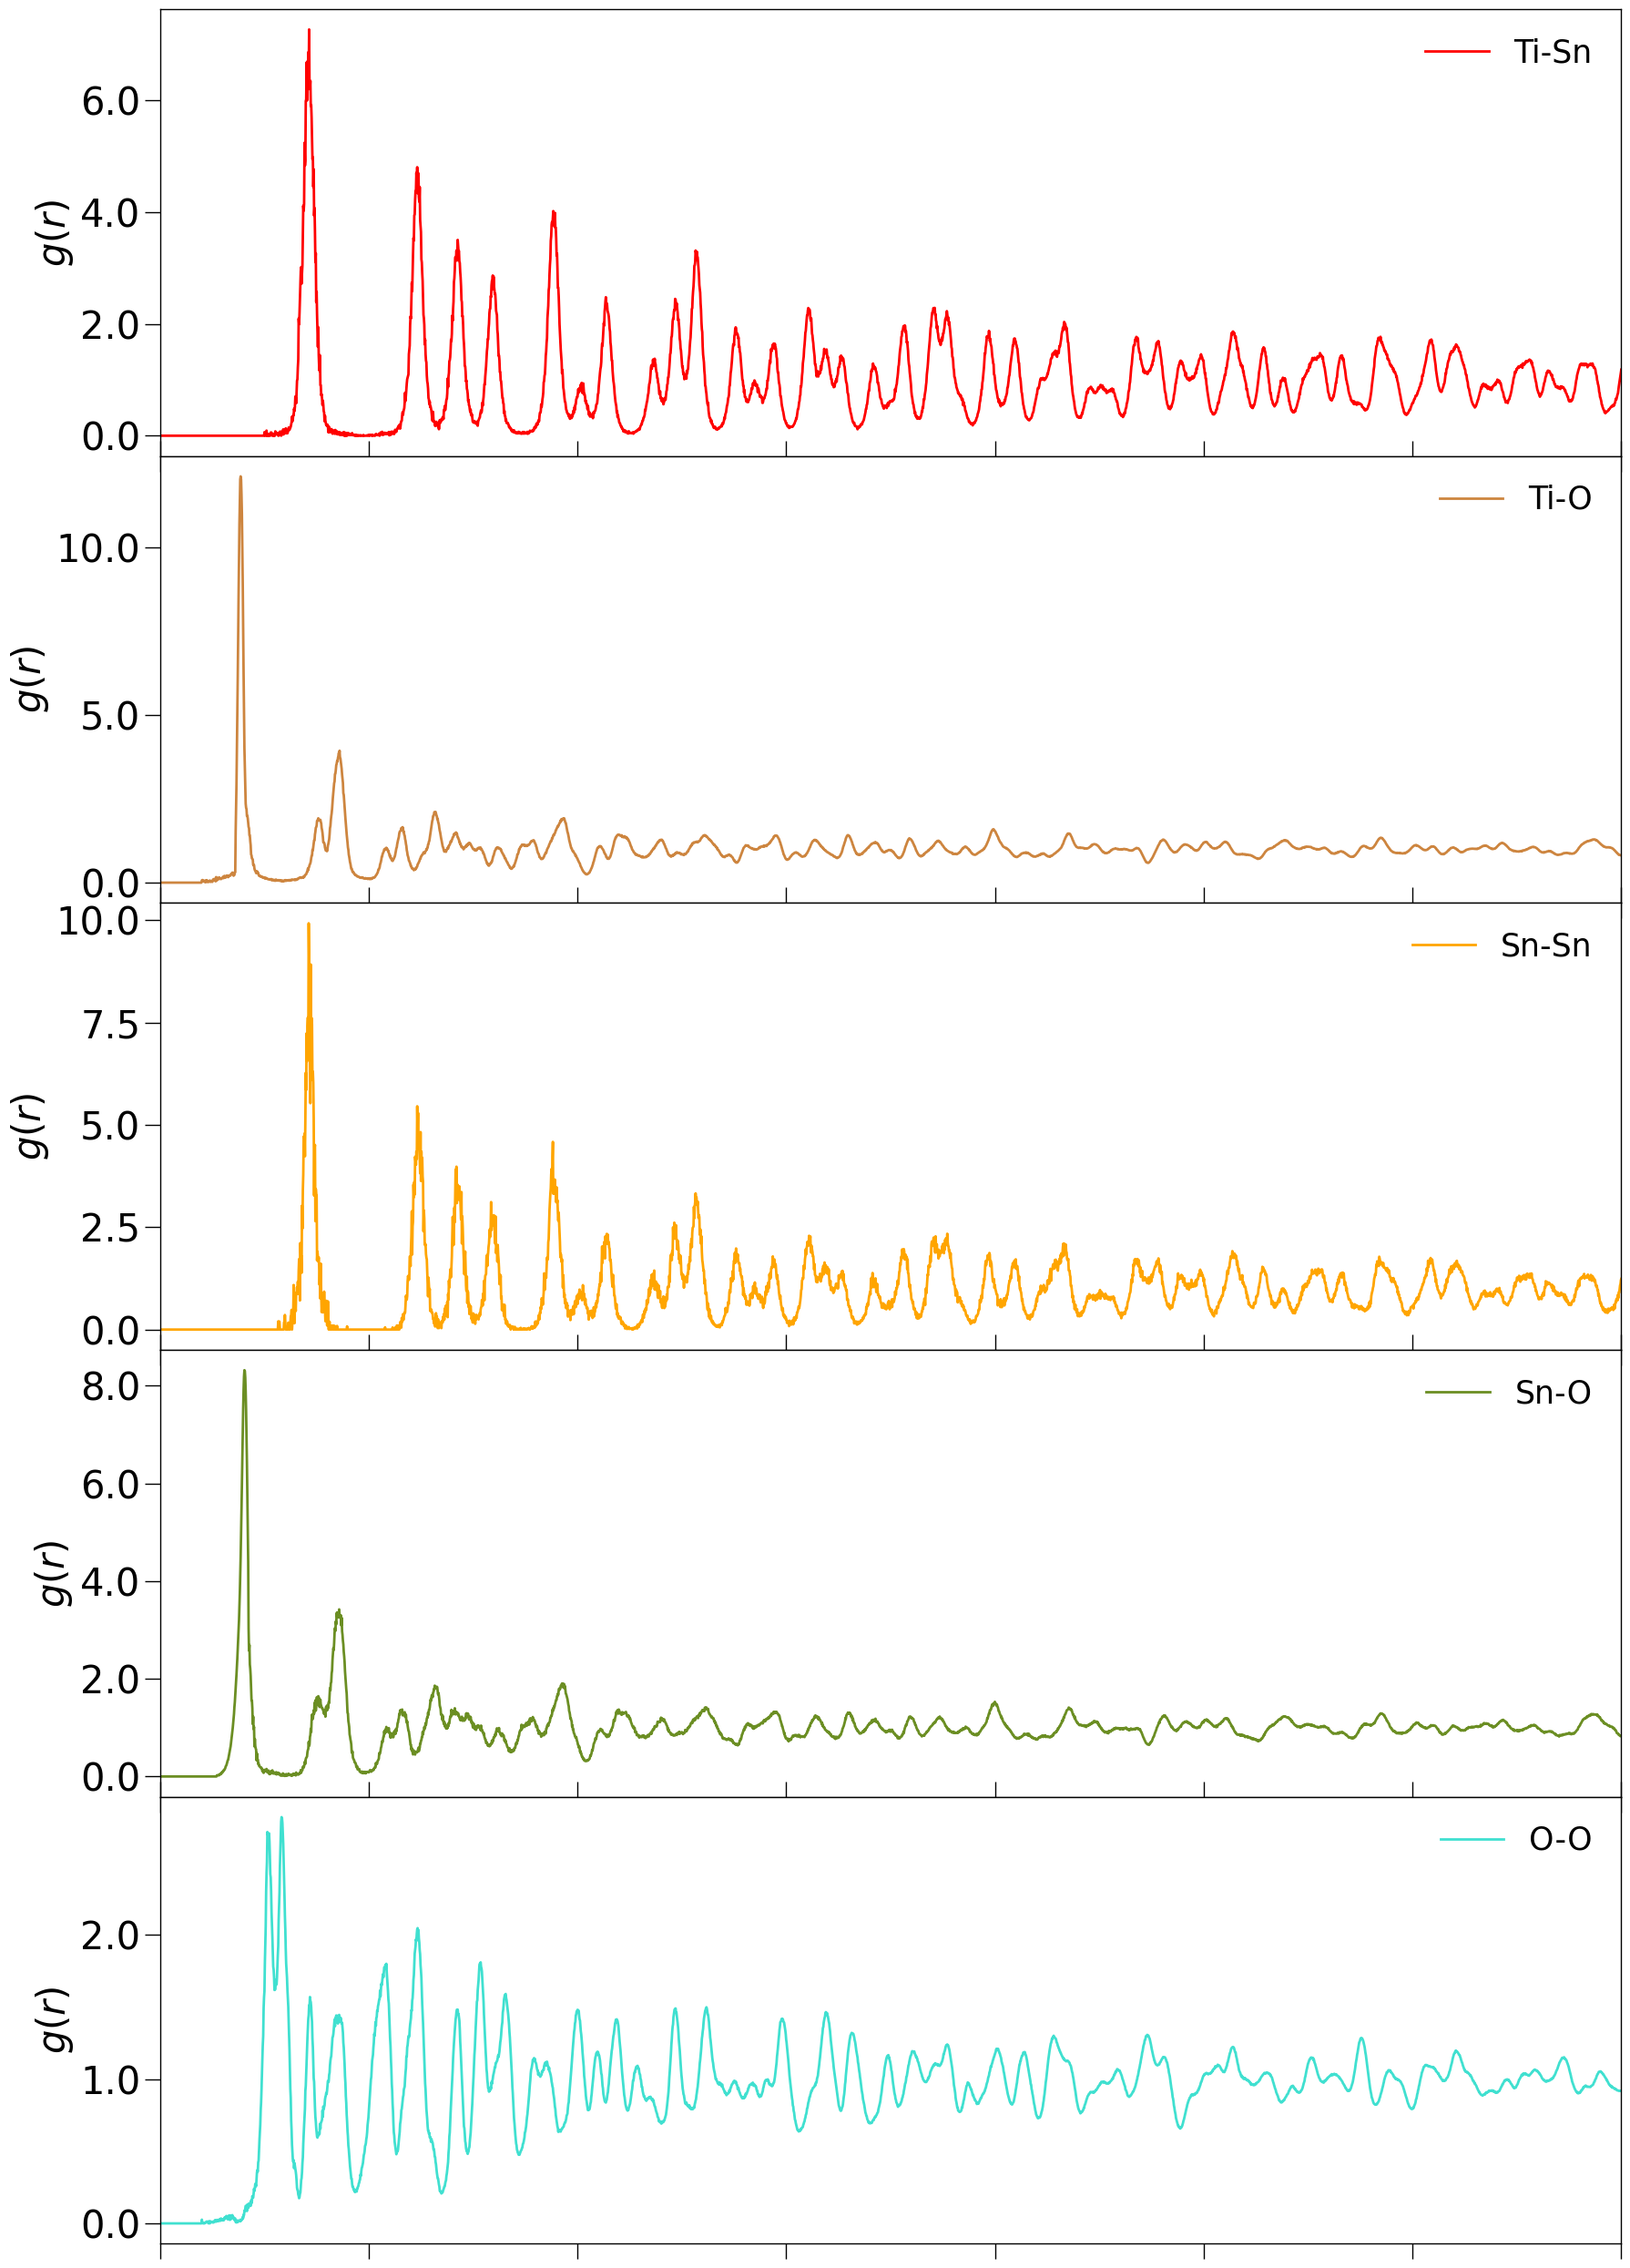

In [26]:
f = plt.figure(figsize=(18, 25))
gs = gridspec.GridSpec(5, 1, height_ratios=[1 for _ in range(5)], hspace=0)
axes = list()
for i in range(5):
    axes.append(plt.subplot(gs[i, 0]))

partial_dict = {
    0: {
        "label": "Ti-Sn",
        "color": "red"
    },
    1: {
        "label": "Ti-O",
        "color": "peru"
    },
    2: {
        "label": "Sn-Sn",
        "color": "orange"
    },
    3: {
        "label": "Sn-O",
        "color": "olivedrab"
    },
    4: {
        "label": "O-O",
        "color": "turquoise"
    }
}

partial_data = stem_name + "_PDFpartials_new.csv"
partial_df = pd.read_csv(partial_data)

for i in range(5):
    partial_r = partial_df.iloc[:, 0].tolist()
    partial_data = partial_df.iloc[:, i + 6].tolist()

    axes[i].plot(partial_r, partial_data, '-', color=partial_dict[i]["color"],
                 label=partial_dict[i]["label"], linewidth=2)

    axes[i].set_xlim([0, 35])
    axes[i].tick_params(axis='x', direction='out', length=12, width=1, labelsize=30)
    if i != 5:
        axes[i].set_xticklabels([])
    if i > 0:
        axes[i].xaxis.set_ticks_position('both')
    axes[i].tick_params(axis='y', direction='out', length=12, width=1, labelsize=30)
    axes[i].spines['left'].set_linewidth(1)
    axes[i].spines['right'].set_linewidth(1)
    axes[i].spines['top'].set_linewidth(1)
    axes[i].spines['bottom'].set_linewidth(1)
    if i == 5:
        axes[i].set_xlabel(r"$r$ ($\AA$)", fontdict={'size': 30})
    axes[i].set_ylabel(r"$g(r)$", fontdict={'size': 30})
    axes[i].legend(fontsize=25, frameon=False)
    axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    if i == 5:
        axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.tight_layout()
_ = f.savefig('partials_part2.png', format='png', dpi=600)

# Bash part - triplets

In [27]:
data2config -noannotate -order [Yb Ti O Sn] -supercell [1 1 1] -rmc6f ${stem_name}.rmc6f

 Job done by data2config. Enjoy your RMC journey!


In [28]:
data2config -noannotate -order [Yb Sn O Ti] -supercell [1 1 1] -rmc6f ${stem_name}.rmc6f

 Job done by data2config. Enjoy your RMC journey!


In [29]:
echo -e "300\n0\n1\n${stem_name}_Ti_only.rmc6f\n0. 0. 3. 0. 3. 0.\n0. 0. 1. 0. 1. 0.\nytso_0_triplets_Ti_only.ave\nytso_0_triplets_Ti_only.hist" > triplets_Ti_only.in

triplets_new_bonds_sinth < triplets_Ti_only.in

 No. of theta pts                           >  No. of neighbours for bond ang (0 for all) >  Number of configurations                   >  Input file     (_counter will be added starting from 1 for no. of configs > 1)        >   Maximum r values (  6     values expected) > 
           1           1           1           2           1           3           2           2           2           3           3           3
 Minimum r values (  6     values expected) > 
 Enter file for average data                > 
 Enter file for angles histogram data       > 
File ytso_0p2_Ti_only.rmc6f processed.
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


In [30]:
echo -e "300\n0\n1\n${stem_name}_Sn_only.rmc6f\n0. 0. 3. 0. 3. 0.\n0. 0. 1. 0. 1. 0.\nytso_0_triplets_Sn_only.ave\nytso_0_triplets_Sn_only.hist" > triplets_Sn_only.in

triplets_new_bonds_sinth < triplets_Sn_only.in

 No. of theta pts                           >  No. of neighbours for bond ang (0 for all) >  Number of configurations                   >  Input file     (_counter will be added starting from 1 for no. of configs > 1)        >   Maximum r values (  6     values expected) > 
           1           1           1           2           1           3           2           2           2           3           3           3
 Minimum r values (  6     values expected) > 
 Enter file for average data                > 
 Enter file for angles histogram data       > 
File ytso_0p2_Sn_only.rmc6f processed.
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


# Python part - triplets

In [31]:
# Grab the data

file_in = open("ytso_0_triplets_Ti_only.hist", "r")
for _ in range(6):
    line = file_in.readline()
while line:
    line = file_in.readline()
    if line:
        if "b323" in line:
            for _ in range(3):
                line = file_in.readline()
            b323_angle = []
            b323_norm = []
            for _ in range(300):
                line = file_in.readline()
                b323_angle.append(float(line.split()[0]))
                b323_norm.append(float(line.split()[2]))
        if "b313" in line:
            for _ in range(3):
                line = file_in.readline()
            b313_angle = []
            b313_norm = []
            for _ in range(300):
                line = file_in.readline()
                b313_angle.append(float(line.split()[0]))
                b313_norm.append(float(line.split()[2]))
        if "b232" in line:
            for _ in range(3):
                line = file_in.readline()
            b232_angle = []
            b232_norm = []
            for _ in range(300):
                line = file_in.readline()
                b232_angle.append(float(line.split()[0]))
                b232_norm.append(float(line.split()[2]))
        if "b231" in line:
            for _ in range(3):
                line = file_in.readline()
            b231_angle = []
            b231_norm = []
            for _ in range(300):
                line = file_in.readline()
                b231_angle.append(float(line.split()[0]))
                b231_norm.append(float(line.split()[2]))
file_in.close()

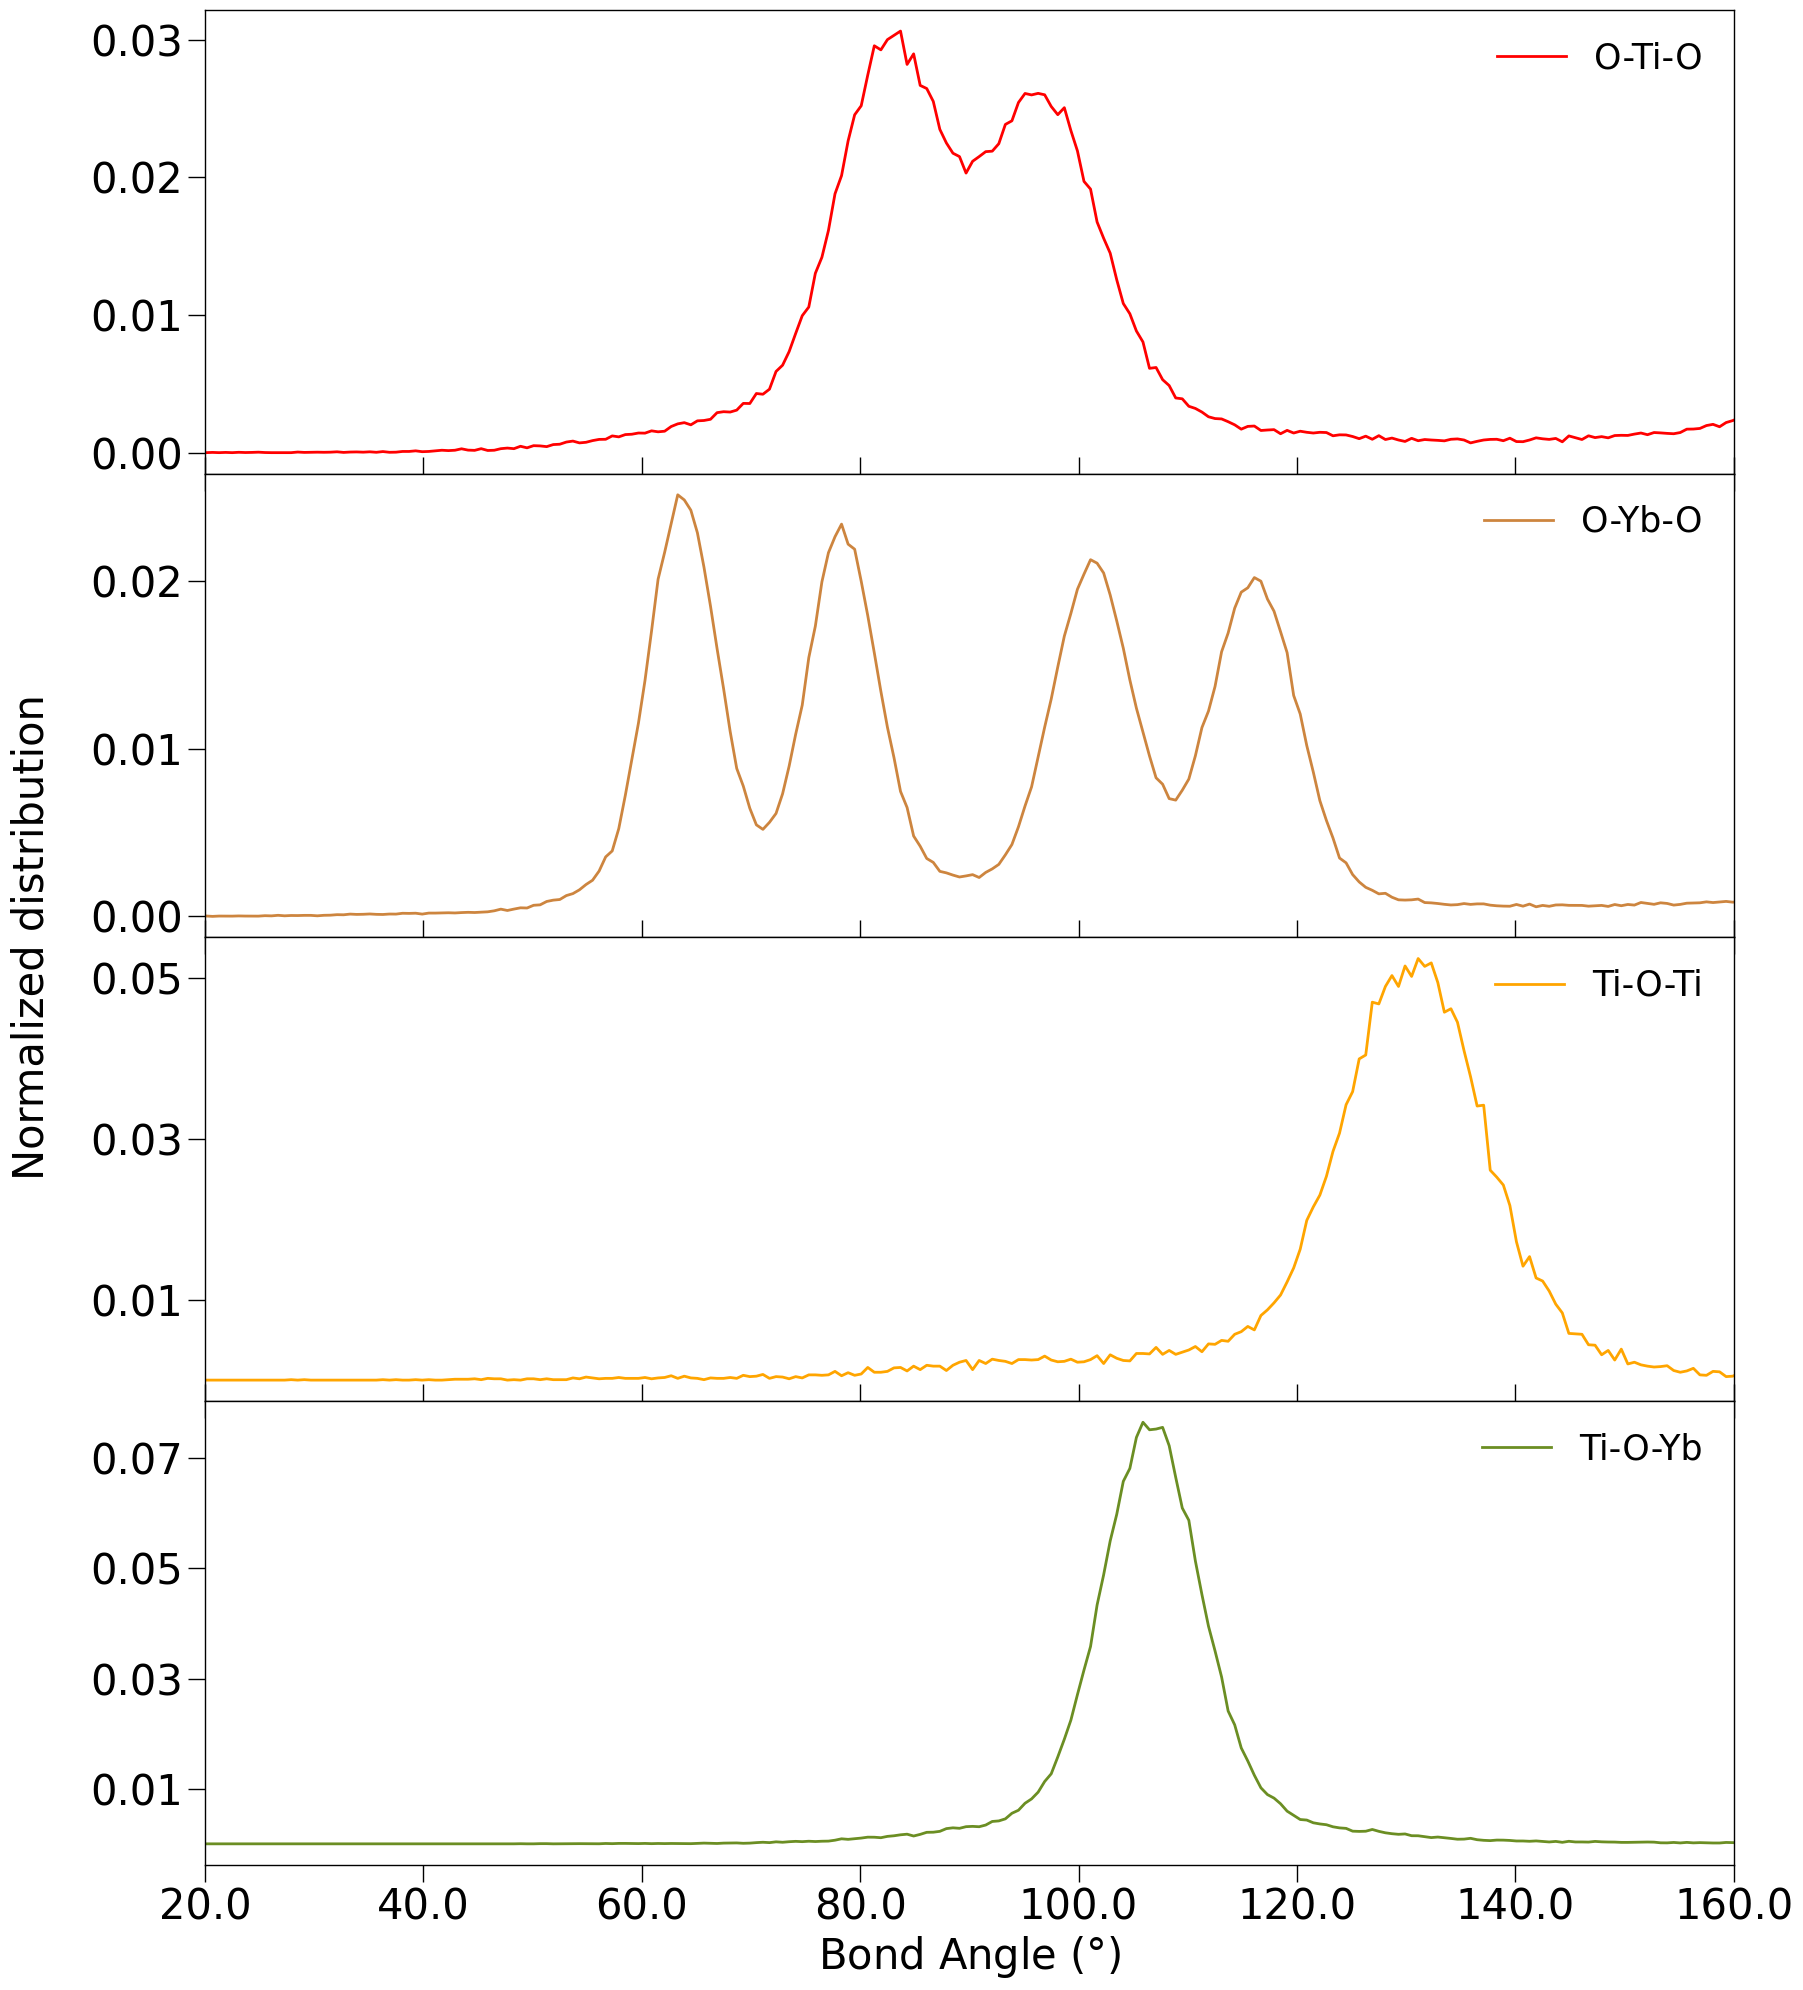

In [32]:
f = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(4, 1, height_ratios=[1 for _ in range(4)], hspace=0)
axes = list()
for i in range(4):
    axes.append(plt.subplot(gs[i, 0]))

angle_dict = {
    0: {
        "label": "O-Ti-O",
        "color": "red",
        "data": {
            "angle": b323_angle,
            "norm": b323_norm
        }
    },
    1: {
        "label": "O-Yb-O",
        "color": "peru",
        "data": {
            "angle": b313_angle,
            "norm": b313_norm
        }
    },
    2: {
        "label": "Ti-O-Ti",
        "color": "orange",
        "data": {
            "angle": b232_angle,
            "norm": b232_norm
        }
    },
    3: {
        "label": "Ti-O-Yb",
        "color": "olivedrab",
        "data": {
            "angle": b231_angle,
            "norm": b231_norm
        }
    }
}

for i in range(4):
    axes[i].plot(angle_dict[i]["data"]["angle"], angle_dict[i]["data"]["norm"],
                 '-', color=angle_dict[i]["color"],
                 label=angle_dict[i]["label"], linewidth=2)

    axes[i].set_xlim([20, 160])
    axes[i].tick_params(axis='x', direction='out', length=12, width=1, labelsize=30)
    if i != 3:
        axes[i].set_xticklabels([])
    if i > 0:
        axes[i].xaxis.set_ticks_position('both')
    axes[i].tick_params(axis='y', direction='out', length=12, width=1, labelsize=30)
    axes[i].spines['left'].set_linewidth(1)
    axes[i].spines['right'].set_linewidth(1)
    axes[i].spines['top'].set_linewidth(1)
    axes[i].spines['bottom'].set_linewidth(1)
    if i == 3:
        axes[i].set_xlabel(r"Bond Angle ($\degree$)", fontdict={'size': 30})
    # axes[i].set_ylabel(r"$g(r)$", fontdict={'size': 30})
    axes[i].legend(fontsize=25, frameon=False)
    axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    if i == 3:
        axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
_ = axes[3].set_yticks([0.01, 0.03, 0.05, 0.07])
_ = axes[2].set_yticks([0.01, 0.03, 0.05])
_ = axes[1].set_yticks([0.0, 0.01, 0.02])
axes[1].set_ylabel(r"Normalized distribution", fontdict={'size': 30})
axes[1].yaxis.set_label_coords(-0.10, 0.)
plt.tight_layout()
_ = f.savefig('triplets_Ti_only.png', format='png', dpi=600)

In [33]:
# Grab the data

file_in = open("ytso_0_triplets_Sn_only.hist", "r")
for _ in range(6):
    line = file_in.readline()
while line:
    line = file_in.readline()
    if line:
        if "b323" in line:
            for _ in range(3):
                line = file_in.readline()
            b323_angle = []
            b323_norm = []
            for _ in range(300):
                line = file_in.readline()
                b323_angle.append(float(line.split()[0]))
                b323_norm.append(float(line.split()[2]))
        if "b313" in line:
            for _ in range(3):
                line = file_in.readline()
            b313_angle = []
            b313_norm = []
            for _ in range(300):
                line = file_in.readline()
                b313_angle.append(float(line.split()[0]))
                b313_norm.append(float(line.split()[2]))
        if "b232" in line:
            for _ in range(3):
                line = file_in.readline()
            b232_angle = []
            b232_norm = []
            for _ in range(300):
                line = file_in.readline()
                b232_angle.append(float(line.split()[0]))
                b232_norm.append(float(line.split()[2]))
        if "b231" in line:
            for _ in range(3):
                line = file_in.readline()
            b231_angle = []
            b231_norm = []
            for _ in range(300):
                line = file_in.readline()
                b231_angle.append(float(line.split()[0]))
                b231_norm.append(float(line.split()[2]))
file_in.close()

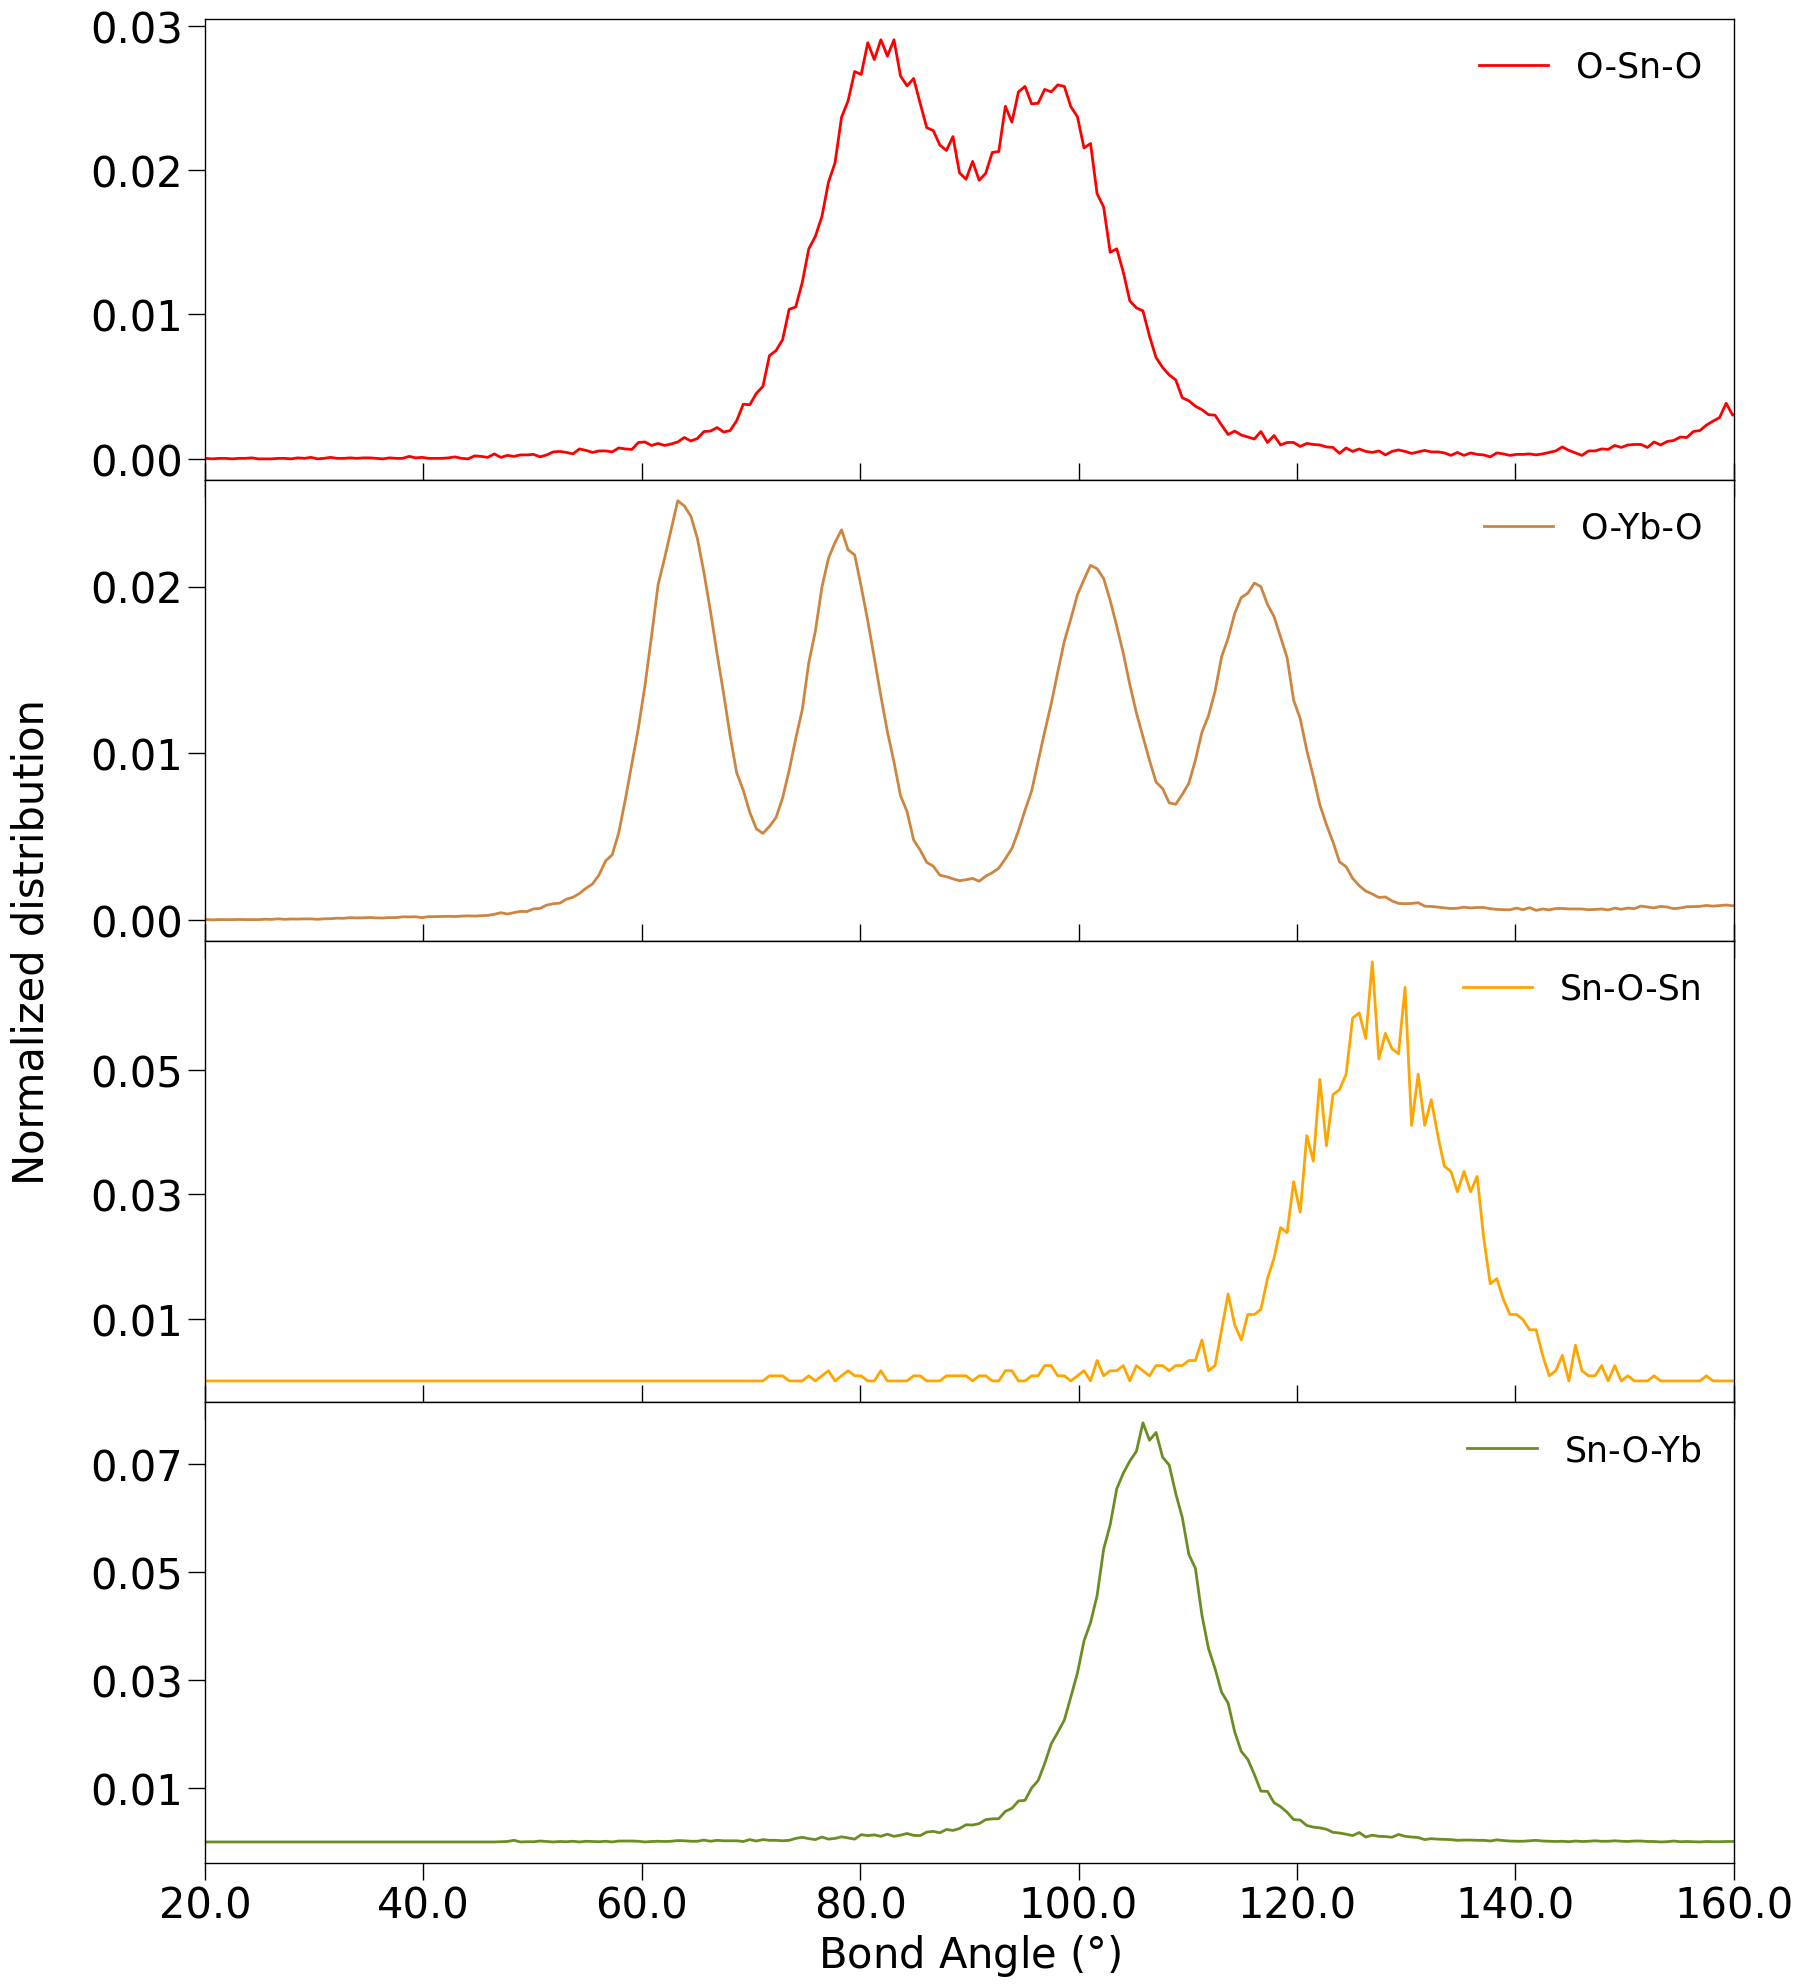

In [34]:
f = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(4, 1, height_ratios=[1 for _ in range(4)], hspace=0)
axes = list()
for i in range(4):
    axes.append(plt.subplot(gs[i, 0]))

angle_dict = {
    0: {
        "label": "O-Sn-O",
        "color": "red",
        "data": {
            "angle": b323_angle,
            "norm": b323_norm
        }
    },
    1: {
        "label": "O-Yb-O",
        "color": "peru",
        "data": {
            "angle": b313_angle,
            "norm": b313_norm
        }
    },
    2: {
        "label": "Sn-O-Sn",
        "color": "orange",
        "data": {
            "angle": b232_angle,
            "norm": b232_norm
        }
    },
    3: {
        "label": "Sn-O-Yb",
        "color": "olivedrab",
        "data": {
            "angle": b231_angle,
            "norm": b231_norm
        }
    }
}

for i in range(4):
    axes[i].plot(angle_dict[i]["data"]["angle"], angle_dict[i]["data"]["norm"],
                 '-', color=angle_dict[i]["color"],
                 label=angle_dict[i]["label"], linewidth=2)

    axes[i].set_xlim([20, 160])
    axes[i].tick_params(axis='x', direction='out', length=12, width=1, labelsize=30)
    if i != 3:
        axes[i].set_xticklabels([])
    if i > 0:
        axes[i].xaxis.set_ticks_position('both')
    axes[i].tick_params(axis='y', direction='out', length=12, width=1, labelsize=30)
    axes[i].spines['left'].set_linewidth(1)
    axes[i].spines['right'].set_linewidth(1)
    axes[i].spines['top'].set_linewidth(1)
    axes[i].spines['bottom'].set_linewidth(1)
    if i == 3:
        axes[i].set_xlabel(r"Bond Angle ($\degree$)", fontdict={'size': 30})
    # axes[i].set_ylabel(r"$g(r)$", fontdict={'size': 30})
    axes[i].legend(fontsize=25, frameon=False)
    axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    if i == 3:
        axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
_ = axes[3].set_yticks([0.01, 0.03, 0.05, 0.07])
_ = axes[2].set_yticks([0.01, 0.03, 0.05])
_ = axes[1].set_yticks([0.0, 0.01, 0.02])
axes[1].set_ylabel(r"Normalized distribution", fontdict={'size': 30})
axes[1].yaxis.set_label_coords(-0.10, 0.)
plt.tight_layout()
_ = f.savefig('triplets_Sn_only.png', format='png', dpi=600)